# Project 2
## House Prices - Advanced Regression Techniques
#### José Jenaro Fernández Velázquez / Rodrigo Fritz Hernández

A good place to check different linear regression models is https://scikit-learn.org/stable/modules/linear_model.html

To begin, we load the necessary modules:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import date, datetime
#from datetime import datetm

print(f'Notebook last rerun on {date.today()} at {datetime.now()}')
#date.strftime

Notebook last rerun on 2021-10-14 at 2021-10-14 11:26:48.102866


Then, we load the training data.

In [2]:
#train = pd.read_csv('https://raw.githubusercontent.com/jenarofv/house-prices/main/train.csv') # use when online
train = pd.read_csv('train.csv') #use when offline

We would like to take a look on what kind of information we are dealing with.
Specially, we would like to know what *non numerical information* we are given:

In [3]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Let's take a closer look at the non numerical information we are given.

In [4]:
pd.set_option('display.max_columns', 81)
train.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


There are 43 `object` type columns, along with 38 numerical columns, 3 of them `float` type.
The ```float``` columns are displayed next

In [5]:
train.select_dtypes(include='float') #it displays the same as float64

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [6]:
train.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [7]:
train.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [8]:
np.sort(train.MasVnrArea)[-100:]

array([ 423.,  424.,  424.,  425.,  425.,  426.,  428.,  432.,  435.,
        436.,  438.,  442.,  442.,  443.,  448.,  450.,  451.,  452.,
        456.,  456.,  456.,  456.,  459.,  464.,  466.,  468.,  472.,
        472.,  473.,  479.,  480.,  480.,  481.,  491.,  500.,  506.,
        510.,  513.,  513.,  528.,  530.,  541.,  554.,  562.,  564.,
        567.,  571.,  573.,  576.,  579.,  584.,  594.,  600.,  603.,
        604.,  616.,  621.,  630.,  632.,  640.,  650.,  650.,  651.,
        653.,  660.,  660.,  664.,  673.,  705.,  731.,  748.,  760.,
        762.,  766.,  768.,  772.,  788.,  796.,  816.,  860.,  870.,
        894.,  921.,  922.,  975., 1031., 1047., 1115., 1129., 1170.,
       1378., 1600.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan])

We see that there are actually not decimals, so we can work only with integers

In [9]:
train_int = train.copy()

In [10]:
train_int.MasVnrArea.replace(np.nan, 0, inplace=True)
train_int.GarageYrBlt.replace(np.nan, 0, inplace=True)
train_int.LotFrontage.replace(np.nan, 0, inplace=True)

In [11]:
np.sort(train_int.MasVnrArea)[-9:]

array([ 922.,  975., 1031., 1047., 1115., 1129., 1170., 1378., 1600.])

In [12]:
train_int.MasVnrArea = train_int.MasVnrArea.astype('int64')
train_int.GarageYrBlt = train_int.GarageYrBlt.astype('int64')
train_int.LotFrontage = train_int.LotFrontage.astype('int64')

In [13]:
train_int.select_dtypes(include='int64')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65,8450,7,5,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80,9600,6,8,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68,11250,7,5,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60,9550,7,5,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84,14260,8,5,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62,7917,6,5,1999,2000,0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85,13175,6,6,1978,1988,119,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66,9042,7,9,1941,2006,0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68,9717,5,6,1950,1996,0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950,1,240,366,0,112,0,0,0,0,4,2010,142125


We now gather the non numerical information in a list called ```non_num_info```

In [14]:
non_num_info = []
for col in train.columns:
    if(train[col].dtype == object):
        non_num_info.append(col)

By looking into the ```data_description.txt``` file, we realize that some columns (e.g. ```ExterQual```) evaluate quality, which can also be evaluated on a 0 to 10 scale.
This scale would go like this:

|string assigned | value | numerical scale |
|----|----|:-:|
|Ex |Excellent| 10 |
|Gd |Good| 8|
|TA |Typical/Avg| 6|
|Fa |Fair| 4|
|Po |Poor| 2|
|NA| Not available|  0|

Please notice that the ```NA``` value is only present if a house does not feature the characteristic of the column (e.g. a ```NA``` in the ```FireplaceQu``` represents that the house has no fireplace.)
We should treat the ```bsmtExposure``` differently, since its possible values are:

|string assigned | value | numerical scale |
|----|----|:-:|
|Gd |Good| 10|
|Av |Average| 7.5|
|Mn |Minimum| 5|
|No |No exposure| 2.5|
|NA| No basement| 0|

At last, we can see in the ```data_description``` file that the ```CentralAir```column has Y/N values,
which makes it really easy to convert to 0s and 1s

We will find these columns using the next piece of code, in which we also define the function to transform the data into numbers.

In [15]:
# used to detect NA values in the "BsmtExposure" column.
#for i in range(1460):
    #if train.BsmtExposure[i] != train.BsmtExposure[i]:
        #print(i)

In [16]:
train.loc[train.BsmtExposure.isna()].index #indexes of the NaNs

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [17]:
train.BsmtExposure[16:19] #just to check that indeed entry 17 is a NaN

16     No
17    NaN
18     No
Name: BsmtExposure, dtype: object

In [18]:
scalable= []
for col in non_num_info:
    if train[col][1] in ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'GLQ', 'ALQ', 'BLQ', 'LwQ', 'Rec', 'Unf',
                        'RFn', 'Fin'] or col == 'CentralAir':
        scalable.append(col)
print(scalable)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']


In [19]:
train1 = train.copy()

In [20]:
def to_numbers(value, col):
    
    if value!=value: # esto revisa si el valor es NaN.
        return(value)
    
    if col == 'CentralAir':
        if value == 'Y':
            return(1)
        else:
            return(0)
        
    elif col == 'BsmtExposure':
        if   value == 'Gd':
            return (8)
        elif value == 'Av':
            return (6)
        elif value == 'Mn':
            return (4)
        elif value == 'No':
            return (2)
        else:
            return (0)
        
    else:
        if   value == 'Ex': #Excellent
            return(10)
        elif value == 'Gd': #Good
            return(8)
        elif value == 'TA': # Typical/Average
            return(6)
        elif value == 'Fa': # Fair
            return(4)
        elif value == 'Po': # Poor
            return(2)
        elif value == 'GLQ': #Good Living Quarters
            return (10)
        elif value == 'Fin': #Finished
            return (10)
        elif value == 'ALQ': #Avg LQ
            return (8)
        elif value == 'Rec': #Avg recreation room
            return (8)
        elif value == 'BLQ': #Below avg
            return (6)
        elif value == 'RFn': #Rough Finished
            return (6)
        elif value == 'LwQ': #Low Quality
            return (4)
        elif value == 'Unf': #Unfinished
            return (2)
        else:
            return(0)

for i in range(1460):
    for col in scalable:
        train1[col][i] = to_numbers(train1[col][i], col)

<ipython-input-20-79f630a9b606>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1[col][i] = to_numbers(train1[col][i], col)


Let's see some examples of the newly ordered parameters

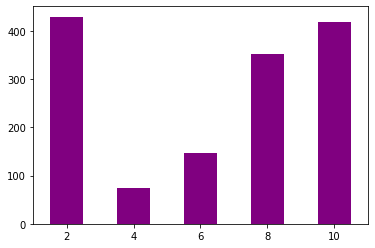

In [21]:
train1.BsmtFinType1.value_counts(sort=False).plot.bar(color='purple')
plt.xticks(rotation=0);

After what we did, we should convert the data type of each modified column. Unfortunately, the `NaN` values are `float`-type values, so in order to keep them, we will convert the _scalable_ columns into `floats`

In [22]:
for col in scalable:
    #print(col)
    train1[col] = train1[col].astype('float')

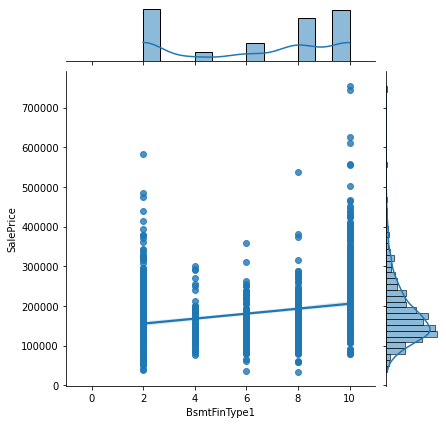

In [23]:
sns.jointplot(x=train1.BsmtFinType1, y=train.SalePrice, kind='reg', xlim=(-1,11));
#train1.BsmtFinType1 = train1.BsmtFinType1.astype('int')

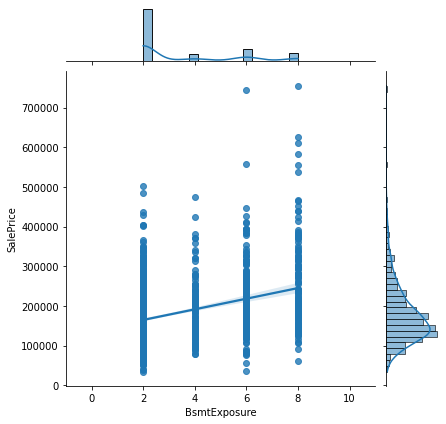

In [24]:
sns.jointplot(x=train1.BsmtExposure, y=train.SalePrice, kind='reg', xlim=(-1,11));

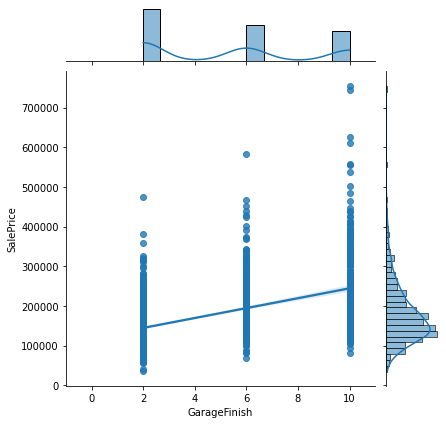

In [25]:
sns.jointplot(x=train1.GarageFinish, y=train.SalePrice, kind='reg', xlim=(-1,11));

The next table shows which columns still have non numerical information:

In [26]:
train1.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,SBrkr,Min1,Attchd,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,SBrkr,Typ,Attchd,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,FuseA,Typ,Attchd,Y,NaN,NaN,NaN,WD,Normal


In [27]:
train1[scalable]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,8.0,6.0,8.0,6.0,2.0,10.0,2.0,10.0,1.0,8.0,NaN,6.0,6.0,6.0
1,6.0,6.0,8.0,6.0,8.0,8.0,2.0,10.0,1.0,6.0,6.0,6.0,6.0,6.0
2,8.0,6.0,8.0,6.0,4.0,10.0,2.0,10.0,1.0,8.0,6.0,6.0,6.0,6.0
3,6.0,6.0,6.0,8.0,2.0,8.0,2.0,8.0,1.0,8.0,8.0,2.0,6.0,6.0
4,8.0,6.0,8.0,6.0,6.0,10.0,2.0,10.0,1.0,8.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,6.0,8.0,6.0,2.0,2.0,2.0,10.0,1.0,6.0,6.0,6.0,6.0,6.0
1456,6.0,6.0,8.0,6.0,2.0,8.0,8.0,6.0,1.0,6.0,6.0,2.0,6.0,6.0
1457,10.0,8.0,6.0,8.0,2.0,10.0,2.0,10.0,1.0,8.0,8.0,6.0,6.0,6.0
1458,6.0,6.0,6.0,6.0,4.0,10.0,8.0,8.0,1.0,8.0,NaN,2.0,6.0,6.0


## Neighborhood

We will now examine how the house location affects it sale price.
First, we count the houses in each neighborhood

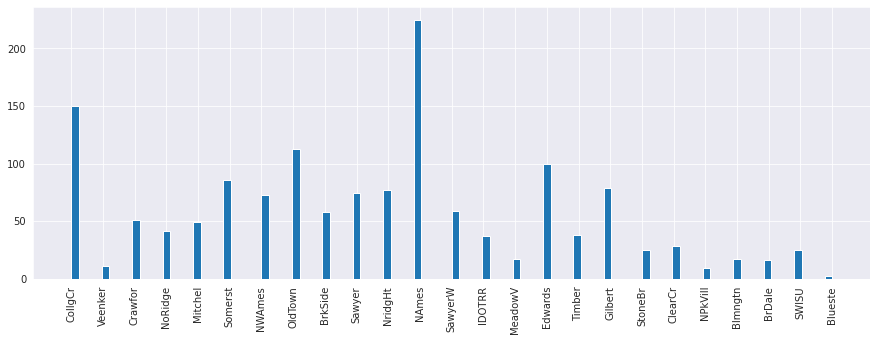

In [28]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,5))
    plt.hist(train.Neighborhood, bins=100)
    plt.xticks(rotation=90);

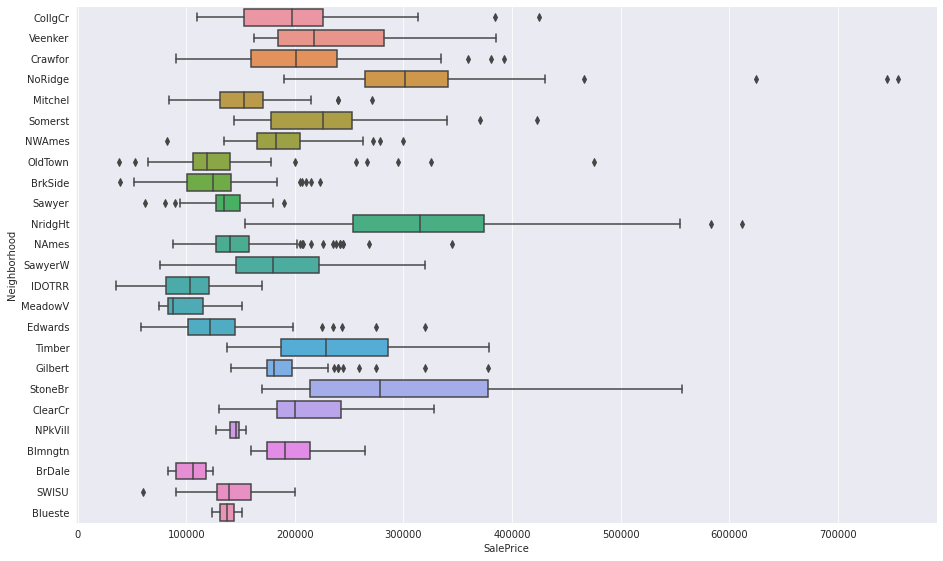

In [29]:
with sns.axes_style('darkgrid'):
    g=sns.catplot(x=train.SalePrice, y='Neighborhood', kind="box", data=train)
    g.fig.set_size_inches(15,8)

As one can see, the neighborhood really affects the price, but we're gonna skip it by now 

## Basement

Since there are eleven columns related to the basement, we should also examine how it affects the sale price.

In [30]:
Bsmt = train1[['SalePrice', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
               'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF']]
Bsmt

,SalePrice,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF
0,208500,856,8.0,6.0,2.0,706,0,10.0,2.0,1,0,150
1,181500,1262,8.0,6.0,8.0,978,0,8.0,2.0,0,1,284
2,223500,920,8.0,6.0,4.0,486,0,10.0,2.0,1,0,434
3,140000,756,6.0,8.0,2.0,216,0,8.0,2.0,1,0,540
4,250000,1145,8.0,6.0,6.0,655,0,10.0,2.0,1,0,490
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,953,8.0,6.0,2.0,0,0,2.0,2.0,0,0,953
1456,210000,1542,8.0,6.0,2.0,790,163,8.0,8.0,1,0,589
1457,266500,1152,6.0,8.0,2.0,275,0,10.0,2.0,0,0,877
1458,142125,1078,6.0,6.0,4.0,49,1029,10.0,8.0,1,0,0


In [31]:
Bsmt.corr().style.background_gradient(cmap='coolwarm')

,SalePrice,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF
SalePrice,1.000000,0.613581,0.644019,0.160658,0.352958,0.386420,-0.011378,0.256892,-0.047563,0.227122,-0.016844,0.214479
TotalBsmtSF,0.613581,1.000000,0.445487,0.082619,0.321882,0.522396,0.104810,0.250517,0.034856,0.307351,-0.000315,0.415360
BsmtQual,0.644019,0.445487,1.000000,0.210796,0.325607,0.269260,-0.079499,0.241137,-0.102531,0.182392,-0.050026,0.165593
BsmtCond,0.160658,0.082619,0.210796,1.000000,0.089192,0.061535,0.081690,0.120182,0.085457,0.084488,0.061220,-0.017323
BsmtExposure,0.352958,0.321882,0.325607,0.089192,1.000000,0.344556,0.085681,0.280521,0.059145,0.318054,0.070630,-0.089919
BsmtFinSF1,0.386420,0.522396,0.269260,0.061535,0.344556,1.000000,-0.050117,0.691804,-0.043532,0.649212,0.067418,-0.495251
BsmtFinSF2,-0.011378,0.104810,-0.079499,0.081690,0.085681,-0.050117,1.000000,0.031561,0.811222,0.158678,0.070948,-0.209294
BsmtFinType1,0.256892,0.250517,0.241137,0.120182,0.280521,0.691804,0.031561,1.000000,0.058617,0.562390,0.066005,-0.498398
BsmtFinType2,-0.047563,0.034856,-0.102531,0.085457,0.059145,-0.043532,0.811222,0.058617,1.000000,0.135646,0.117762,-0.224478
BsmtFullBath,0.227122,0.307351,0.182392,0.084488,0.318054,0.649212,0.158678,0.562390,0.135646,1.000000,-0.147871,-0.422900


Now we plot the different basement parameters versus the `SalePrice` variable.

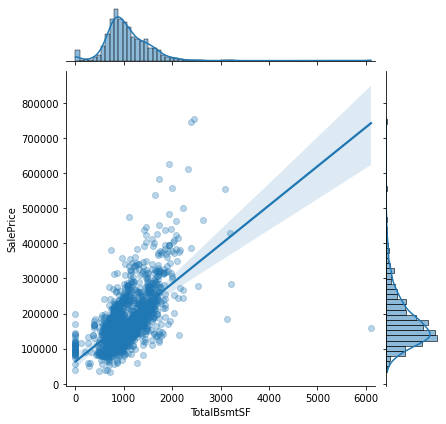

In [32]:
g = sns.jointplot(x=train1.TotalBsmtSF, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-200,6200))

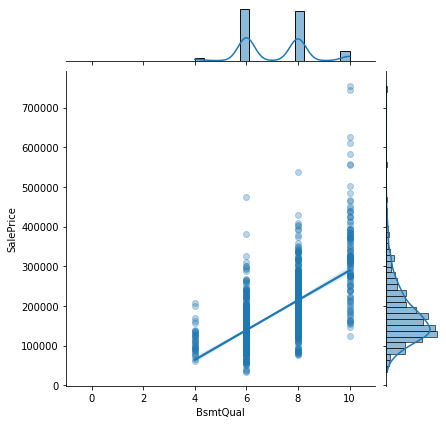

In [33]:
g = sns.jointplot(x=train1.BsmtQual, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

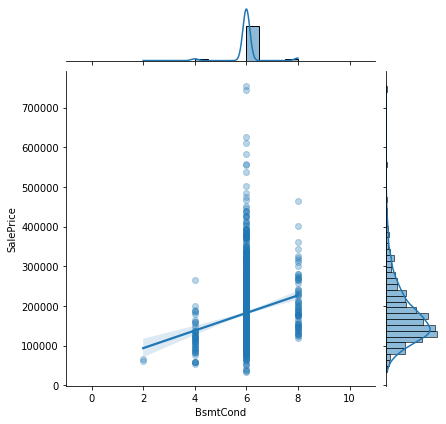

In [34]:
g = sns.jointplot(x=train1.BsmtCond, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

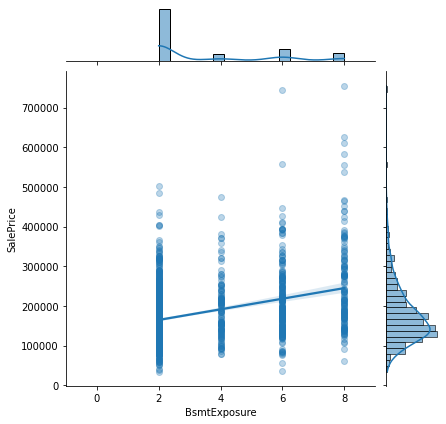

In [35]:
g = sns.jointplot(x=train1.BsmtExposure, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,9))
g.ax_joint.set_xticks(np.arange(0,9,2));

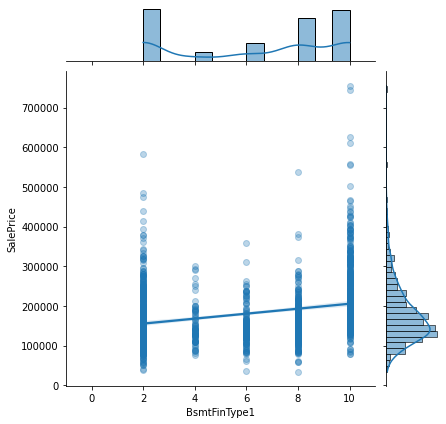

In [36]:
g = sns.jointplot(x=train1.BsmtFinType1, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

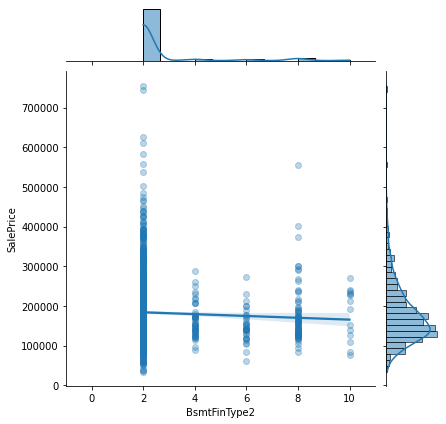

In [37]:
g = sns.jointplot(x=train1.BsmtFinType2, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

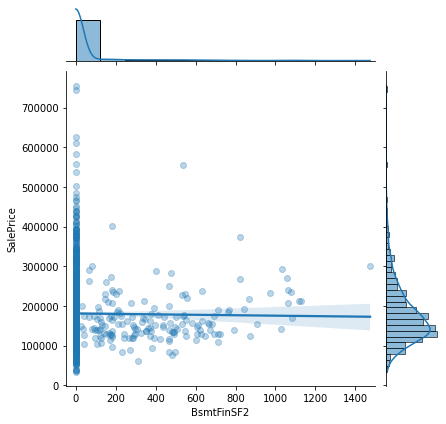

In [38]:
g = sns.jointplot(x=train1.BsmtFinSF2, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-50,1500))

In [39]:
train1.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

Since the `BsmtFinSF2` parameter contains 1293 zeros, we would like to see what happens when we replace those zeros by `NaN`s.

### We might replace the zeros with NaNs in order to get more accurate correlations, unfortunately this only happens with certain variables

In [40]:
train2 = train1.copy() # another copy, so we do not change the values of train1.

In [41]:
# replaces zeros with NaNs.
train2.replace(0, np.NaN, inplace=True)

We now see that the correlation between BsmtFinSF1 and SalePrice increases.

In [42]:
train[['SalePrice', 'BsmtFinSF1']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF1
SalePrice,1.000000,0.386420
BsmtFinSF1,0.386420,1.000000


In [43]:
train2[['SalePrice', 'BsmtFinSF1']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF1
SalePrice,1.000000,0.471690
BsmtFinSF1,0.471690,1.000000


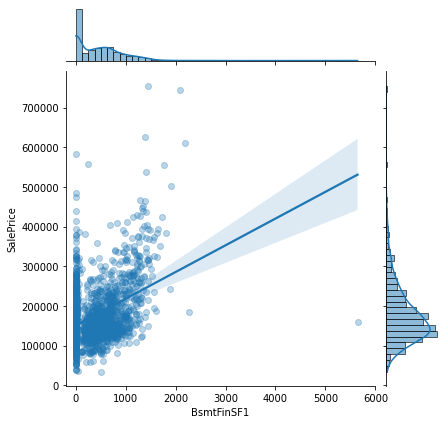

In [44]:
g = sns.jointplot(x=train.BsmtFinSF1, y=train.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-200,6000))

In [45]:
train.loc[train.BsmtFinSF1.isna()].index #indexes of the NaN

Int64Index([], dtype='int64')

`BsmtFinSF1`has no NaNs. As one can see, this parameter is “overpopulated” by zeros. This is how the plot looks without zeros:

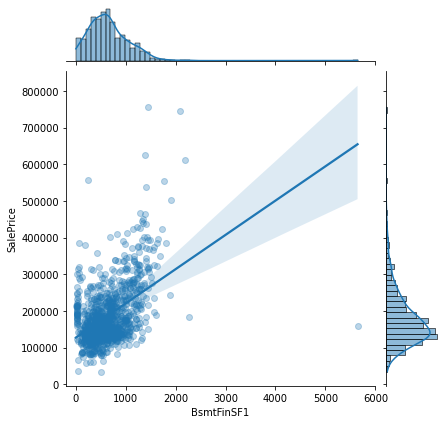

In [46]:
g = sns.jointplot(x=train2.BsmtFinSF1, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-200,6000))

Let's analyze how the correlation between ```BsmtFinSF2``` and ```SalePrice```  changes when removing zeros:

In [47]:
train.loc[train['BsmtFinSF2'].isna()].index

Int64Index([], dtype='int64')

In [48]:
train[['SalePrice', 'BsmtFinSF2']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,-0.011378
BsmtFinSF2,-0.011378,1.000000


In [49]:
train2[['SalePrice', 'BsmtFinSF2']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,0.198956
BsmtFinSF2,0.198956,1.000000


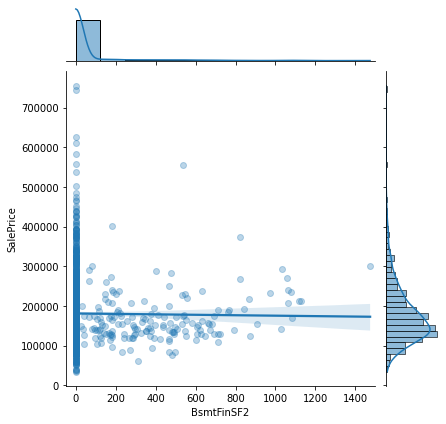

In [50]:
g = sns.jointplot(x=train1.BsmtFinSF2, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-50,1500))

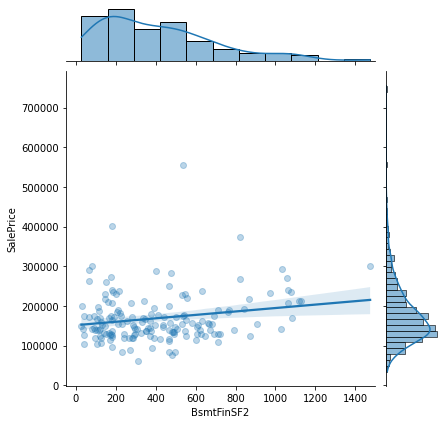

In [51]:
g = sns.jointplot(x=train2.BsmtFinSF2, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-50,1500))

## Let's take a glimpse to the relation between the remaining categorical variables and the sale price

In [52]:
# To remove "max number of figures to be opened" warning (for the next cell):
plt.rcParams.update({'figure.max_open_warning': 0})

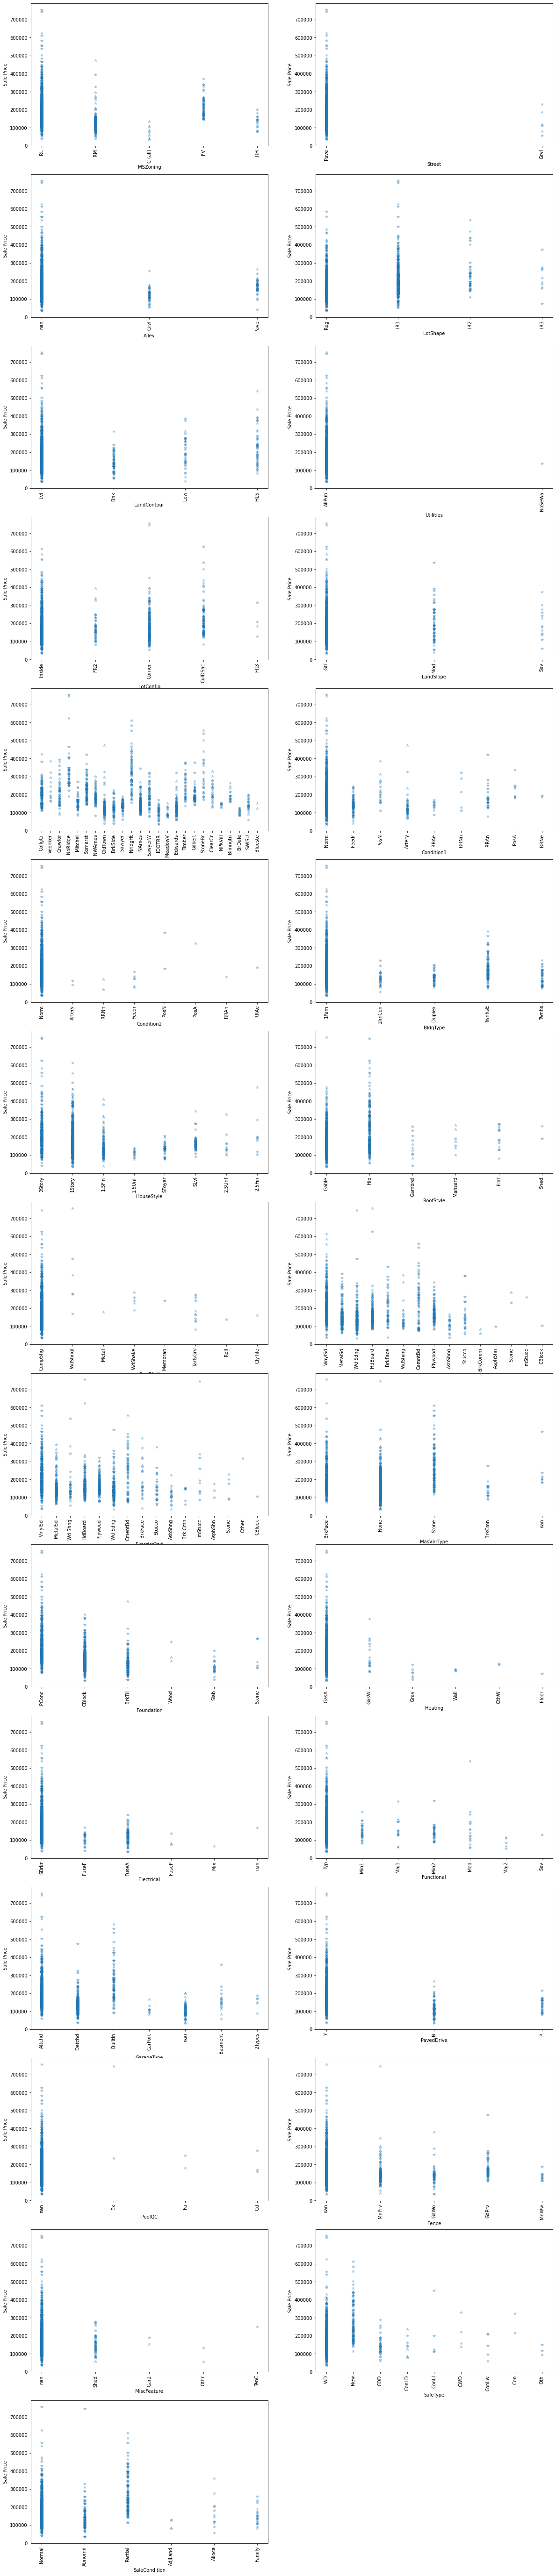

In [53]:
# We remove the columns that have been turned into numbers
remaining = non_num_info.copy()
for col in scalable:
    remaining.remove(col)

i=1
plt.figure(figsize=(20, 100))
for col in remaining:
    plt.subplot(15, 2, i)
    plt.plot(train1[col].astype('str'), train1.SalePrice,'*', alpha = 0.3 )
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Sale Price')
    i += 1

### Now let's take a look at the _numeric_ part of the dataframe:

In [54]:
train1.select_dtypes(exclude='object')
#train1.select_dtypes(include='object')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,8.0,6.0,8.0,6.0,2.0,10.0,706,2.0,0,150,856,10.0,1.0,856,854,0,1710,1,0,2,1,3,1,8.0,8,0,NaN,2003.0,6.0,2,548,6.0,6.0,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,6.0,6.0,8.0,6.0,8.0,8.0,978,2.0,0,284,1262,10.0,1.0,1262,0,0,1262,0,1,2,0,3,1,6.0,6,1,6.0,1976.0,6.0,2,460,6.0,6.0,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,8.0,6.0,8.0,6.0,4.0,10.0,486,2.0,0,434,920,10.0,1.0,920,866,0,1786,1,0,2,1,3,1,8.0,6,1,6.0,2001.0,6.0,2,608,6.0,6.0,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,6.0,6.0,6.0,8.0,2.0,8.0,216,2.0,0,540,756,8.0,1.0,961,756,0,1717,1,0,1,0,3,1,8.0,7,1,8.0,1998.0,2.0,3,642,6.0,6.0,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,8.0,6.0,8.0,6.0,6.0,10.0,655,2.0,0,490,1145,10.0,1.0,1145,1053,0,2198,1,0,2,1,4,1,8.0,9,1,6.0,2000.0,6.0,3,836,6.0,6.0,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,6.0,6.0,8.0,6.0,2.0,2.0,0,2.0,0,953,953,10.0,1.0,953,694,0,1647,0,0,2,1,3,1,6.0,7,1,6.0,1999.0,6.0,2,460,6.0,6.0,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,6.0,6.0,8.0,6.0,2.0,8.0,790,8.0,163,589,1542,6.0,1.0,2073,0,0,2073,1,0,2,0,3,1,6.0,7,2,6.0,1978.0,2.0,2,500,6.0,6.0,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,10.0,8.0,6.0,8.0,2.0,10.0,275,2.0,0,877,1152,10.0,1.0,1188,1152,0,2340,0,0,2,0,4,1,8.0,9,2,8.0,1941.0,6.0,1,252,6.0,6.0,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,6.0,6.0,6.0,6.0,4.0,10.0,49,8.0,1029,0,1078,8.0,1.0,1078,0,0,1078,1,0,1,0,2,1,8.0,5,0,NaN,1950.0,2.0,1,240,6.0,6.0,366,0,112,0,0,0,0,4,2010,142125


Since we now have 52 numeric parameters, we would like to see which ones are more related to our objective variable: *SalePrice*.
For this, we run the next cell:

In [55]:
train1.corr().style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,0.005039,0.029860,-0.041261,0.012356,0.017536,-0.021391,-0.005024,-0.007901,-0.005968,-0.007940,-0.015415,-0.015001,0.009821,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.019772,0.027052,0.000072,0.008766,0.016570,0.017634,0.003646,-0.013292,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,0.016178,-0.064686,0.080763,-0.005129,0.057653,0.016588,-0.069836,-0.032201,-0.065649,-0.140759,-0.238518,-0.019458,-0.101774,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.045569,-0.035341,0.085072,0.008022,-0.040110,-0.098672,0.023819,-0.029774,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.178993,-0.017264,0.172627,0.049283,0.179718,0.084197,0.233633,0.022519,0.049900,0.132644,0.392075,0.098509,0.071659,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.181839,0.352096,0.266639,0.082773,0.070250,0.223501,0.285691,0.344997,0.055362,0.042019,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.055570,0.014732,0.077951,0.028082,0.232055,0.061588,0.214103,0.103226,0.111170,-0.002618,0.260833,0.003581,0.049755,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,0.271364,0.038174,-0.024947,0.102578,0.154871,0.180403,0.028744,0.018842,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.726278,0.013953,0.664650,0.177320,0.261213,0.163152,0.239666,-0.107502,-0.059119,0.308159,0.537808,0.457083,0.272038,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.396765,0.355867,0.547766,0.519623,0.600671,0.562022,0.143944,0.127725,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.138942,0.389163,-0.289654,0.120140,-0.081691,-0.035227,-0.046231,0.083134,0.040229,-0.136841,-0.171098,-0.014105,0.118969,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,-0.023820,-0.019900,-0.324297,-0.210396,-0.185758,-0.151521,0.031460,0.024681,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.598160,-0.103925,0.725563,0.226569,0.282289,0.303995,0.249503,-0.068029,-0.049107,0.149040,0.391452,0.448855,0.381831,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.530165,0.095589,0.147716,0.067656,0.825667,0.583538,0.537850,0.478954,0.219243,0.236921,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.03438

We now see how removing zeros affects the correlation of some of the parameters whose correlation is small

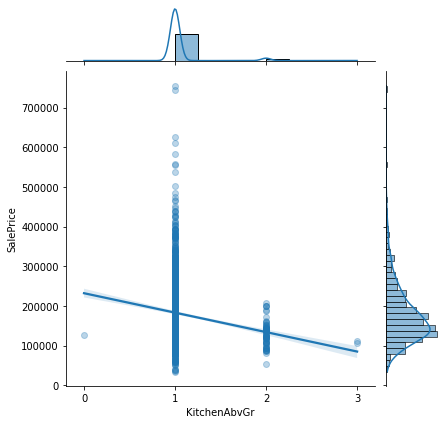

In [56]:
g = sns.jointplot(x=train1.KitchenAbvGr, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-0.2,3.2))
g.ax_joint.set_xticks(range(4));

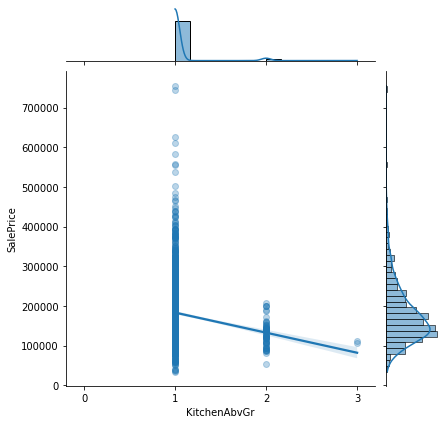

In [57]:
g = sns.jointplot(x=train2.KitchenAbvGr, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-0.2,3.2))
g.ax_joint.set_xticks(range(4));

In this case, there is almost no diference.

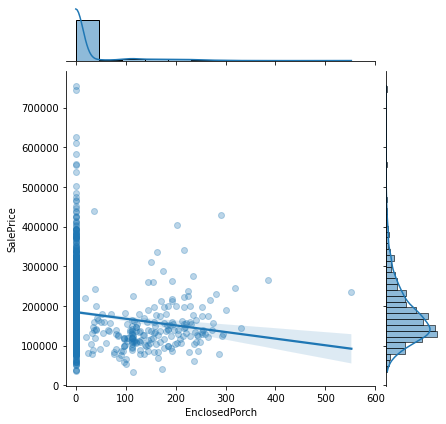

In [58]:
g = sns.jointplot(x=train1.EnclosedPorch, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-20,600))

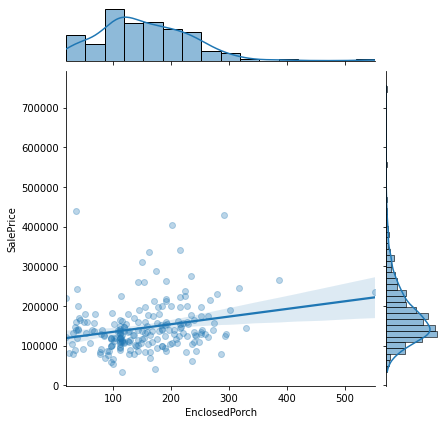

In [59]:
g = sns.jointplot(x=train2.EnclosedPorch, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3))

For the ```EnclosedPorch``` parameter, correlation *does* change after removing zeros:

In [60]:
corr1 = train1.EnclosedPorch.corr(train.SalePrice)
corr2 = train2.EnclosedPorch.corr(train.SalePrice)
print(f'Correlation before removing zeros: {corr1}')
print(f'Correlation after removing zeros: {corr2}')

Correlation before removing zeros: -0.12857795792595658
Correlation after removing zeros: 0.24127883630117494


# Multilinear Regression

To begin with the regressions, we load the `'SalePrice'` column into a variable $y$, which is what we want to estimate, and then we copy the database, excluding the categorical (`'object'`) variables and the `'SalePrice'` column, to apply the linear regression to both objects.

In [65]:
y = train.SalePrice

In [697]:
# pd.set_option('display.max_rows', 10)
train1.isna().any().sum()

19

In [699]:
x1 = train1.copy()
# x1 = x1.drop(173)

# We exclude any non.numerical value, and the sale price, so we can perform a Linear Regression.
x1 = x1.select_dtypes(exclude='object').drop('SalePrice', axis = 1).drop('Id', axis = 1)

# We also drop any column with a NaN.
x1.dropna(axis = 1, inplace = True)

# Or we can convert NaNs to zeros
# x1.replace(np.NaN, 0, inplace=True)

x1

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,8.0,6.0,706,0,150,856,10.0,1.0,856,854,0,1710,1,0,2,1,3,1,8.0,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,6.0,6.0,978,0,284,1262,10.0,1.0,1262,0,0,1262,0,1,2,0,3,1,6.0,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,8.0,6.0,486,0,434,920,10.0,1.0,920,866,0,1786,1,0,2,1,3,1,8.0,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,6.0,6.0,216,0,540,756,8.0,1.0,961,756,0,1717,1,0,1,0,3,1,8.0,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,8.0,6.0,655,0,490,1145,10.0,1.0,1145,1053,0,2198,1,0,2,1,4,1,8.0,9,1,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,6.0,6.0,0,0,953,953,10.0,1.0,953,694,0,1647,0,0,2,1,3,1,6.0,7,1,2,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,6.0,6.0,790,163,589,1542,6.0,1.0,2073,0,0,2073,1,0,2,0,3,1,6.0,7,2,2,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,10.0,8.0,275,0,877,1152,10.0,1.0,1188,1152,0,2340,0,0,2,0,4,1,8.0,9,2,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,6.0,6.0,49,1029,0,1078,8.0,1.0,1078,0,0,1078,1,0,1,0,2,1,8.0,5,0,1,240,366,0,112,0,0,0,0,4,2010


Now we load the necessary modules,

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, explained_variance_score)

Our first attempt to predict the prices is with a linear regression.
As we can see, the `LinearRegression()` returns one coefficient for each `x1` parameter.
It also return an `intercept_` value, which is the $y$-axis-intercept.

In [700]:
ls1 = LinearRegression()
ls1.fit(x1, y)
print(ls1.coef_, '\n\n', len(ls1.coef_), 'coefficients')

[-1.61093450e+02  4.29097379e-01  1.41129122e+04  5.33067316e+03
  2.92471848e+02 -3.37553056e+01  7.21965720e+03 -2.77595872e+03
  1.13763482e+01 -9.18297180e-01 -1.41181550e+00  9.04623548e+00
  5.12804699e+02 -8.89910922e+03  1.81953801e+01  1.67451370e+01
 -4.78034323e+00  3.01601739e+01  7.67153831e+03  3.06909162e+03
  3.19748751e+03  1.18131927e+02 -7.56393205e+03 -1.15928670e+04
  4.93587906e+03  4.31014843e+03  4.48559652e+03  1.00466742e+04
  6.34620175e-01  2.66389187e+01 -1.40376351e+01  1.13469630e+00
  1.96923483e+01  5.71356686e+01 -4.08101695e+01 -9.09257205e-02
 -1.51747496e+02 -8.54744077e+02] 

 38 coefficients


We now use the `.predict` method to compute an approximate price for each house.

In [701]:
x1_price = ls1.predict(x1)
x1_price

array([230954.78493126, 194910.91699077, 228045.75472411, ...,
       253668.57165159, 138592.0118898 , 175344.46549796])

In [702]:
pd.DataFrame(x1_price).describe()

,0
count,1460.000000
mean,180921.195890
std,71922.322366
min,-32711.252285
25%,127120.971045
50%,171583.486873
75%,225648.281742
max,637882.000238


Let's take a look at the percentual errors for this calculation:

In [703]:
error1 = (x1_price - y)/y
abs_err = abs(x1_price - y)/y
print(f'average error: {round(error1.mean()*100, 1)} %')
print(f'min error: {round(abs_err.min()*100, 4)}%, in house {abs_err.argmin()}' )
print(f'max error: {round(error1.max()*100, 1)}%, in house {error1.argmax()}' )

average error: 1.3 %
min error: 0.0024%, in house 619
max error: 298.7%, in house 1298


In [704]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y,x1_price)))
print('R^2: % 1.3f' % r2_score(y,x1_price))

RMSE:  33727
R^2:  0.820


A value for $R^2$ close to 1 is satisfactory

In [705]:
len(y)

1460

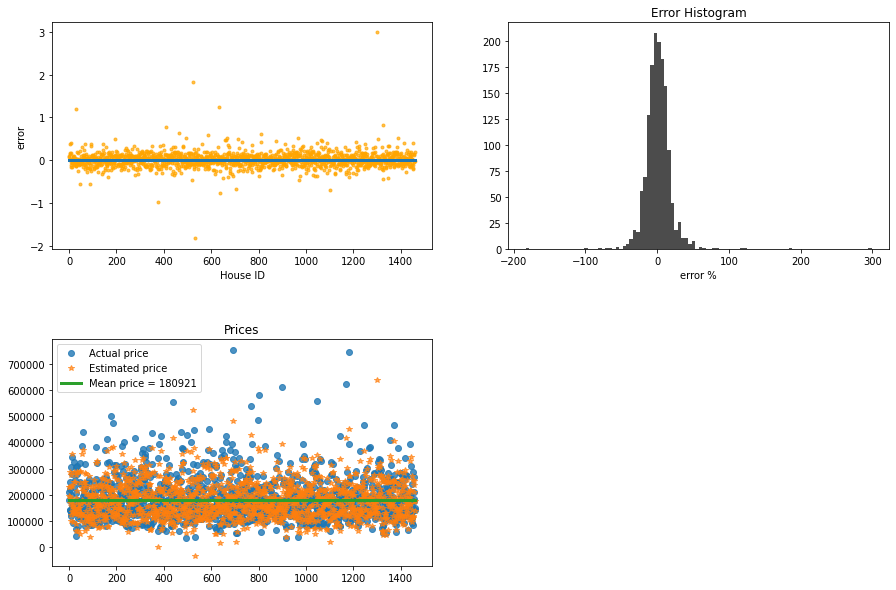

In [706]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(error1, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.plot([0,len(y)], [0, 0], lw=3)
plt.xlabel('House ID')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(error1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, 'o', alpha = 0.8, label = 'Actual price')
plt.plot(x1_price, '*', alpha = 0.7, label = 'Estimated price')#, 'o')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean price = {int(y.mean())}')
plt.title('Prices')
plt.legend();

# Ridge linear regression

In [707]:
ridge = Ridge(alpha=0.5)
ridge.fit(x1, y)
print(ridge.coef_)
print(ridge.intercept_)

[-1.61232405e+02  4.29235864e-01  1.41135708e+04  5.32384304e+03
  2.92470493e+02 -3.34524584e+01  7.22136347e+03 -2.77252193e+03
  1.13872376e+01 -9.09117163e-01 -1.42181396e+00  9.05631985e+00
  5.12461016e+02 -8.81807227e+03  1.81803877e+01  1.67573277e+01
 -4.76127671e+00  3.01764098e+01  7.64126121e+03  3.03696752e+03
  3.17722961e+03  1.12429212e+02 -7.55430907e+03 -1.14544460e+04
  4.93828573e+03  4.29802366e+03  4.48796406e+03  1.00171297e+04
  7.14891560e-01  2.66622098e+01 -1.39956695e+01  1.15510355e+00
  1.97212875e+01  5.71549346e+01 -4.08468937e+01 -9.50144528e-02
 -1.52161037e+02 -8.55374600e+02]
1102704.23237956


In [708]:
ridge_price = ridge.predict(x1)
ridge_price

array([230937.15415562, 194870.61321801, 228051.78366352, ...,
       253664.72994774, 138612.91940707, 175361.2761829 ])

Let's compare with the basic linear regression:

In [709]:
x1_price = ls1.predict(x1)
x1_price

array([230954.78493126, 194910.91699077, 228045.75472411, ...,
       253668.57165159, 138592.0118898 , 175344.46549796])

In [710]:
error1 = (x1_price - ridge_price)/ridge_price
abs_err = abs(x1_price - ridge_price)/ridge_price
print(f'average error: {round(error1.mean()*100, 4)} %')
print(f'min error: {round(abs_err.min()*100, 4)}%, in house {abs_err.argmin()}' )
print(f'max error: {round(error1.max()*100, 4)}%, in house {error1.argmax()}' )

average error: 0.0063 %
min error: -0.1146%, in house 533
max error: 10.0685%, in house 375


In [711]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(ridge_price, x1_price)))
print('R^2: % 1.3f' % r2_score(ridge_price, x1_price))

RMSE:  33
R^2:  1.000


__Ridge linear regression__ is almost the same as __basic linear regression__

In [712]:
pd.DataFrame(ridge_price).describe()

,0
count,1460.000000
mean,180921.195890
std,71918.523896
min,-32748.788518
25%,127148.763481
50%,171568.563642
75%,225635.676922
max,637990.476876


In [713]:
pd.DataFrame(x1_price).describe()

,0
count,1460.000000
mean,180921.195890
std,71922.322366
min,-32711.252285
25%,127120.971045
50%,171583.486873
75%,225648.281742
max,637882.000238


Let's take a look at the percentual errors for this calculation:

In [714]:
error1 = (ridge_price - y)/y
abs_err = abs(ridge_price - y)/y
print(f'average error: {round(error1.mean()*100, 1)} %')
print(f'min error: {round(abs_err.min()*100, 4)}%, in house {abs_err.argmin()}' )
print(f'max error: {round(error1.max()*100, 1)}%, in house {error1.argmax()}' )

average error: 1.3 %
min error: 0.0103%, in house 619
max error: 298.7%, in house 1298


In [715]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y, ridge_price)))
print('R^2: % 1.3f' % r2_score(y, ridge_price))

RMSE:  33727
R^2:  0.820


A value for $R^2$ close to 1 is satisfactory

Next we present a table for different `alpha` values for the ridge regression, all of which gave a $R^2 = 1$ w.r.t. the basic linear regression. The last 2 columns are w.r.t. the train set.

| `alpha` | Difference % | RMSE | Error % | $R^2$ |
|:-:|:-:|:-:|:-:|:-:|
| 0.0 | -0.2102 | 1078 | 1.5 | 0.820 |
| 0.1 | 0.0005 |  7 | 1.9 | 0.758 |
| 0.2 | 0.0010 | 13 | 1.3 | 0.820 |
| 0.5 | 0.0026 | 33 | 1.3 | 0.820 |
| 0.8 | 0.0043 | 52 | 1.3 | 0.820 |
| 1.0 | 0.0054 | 65 | 1.3 | 0.820 |
| 100 | -0.2594 | 2805 | 1.4 | 0.819 |

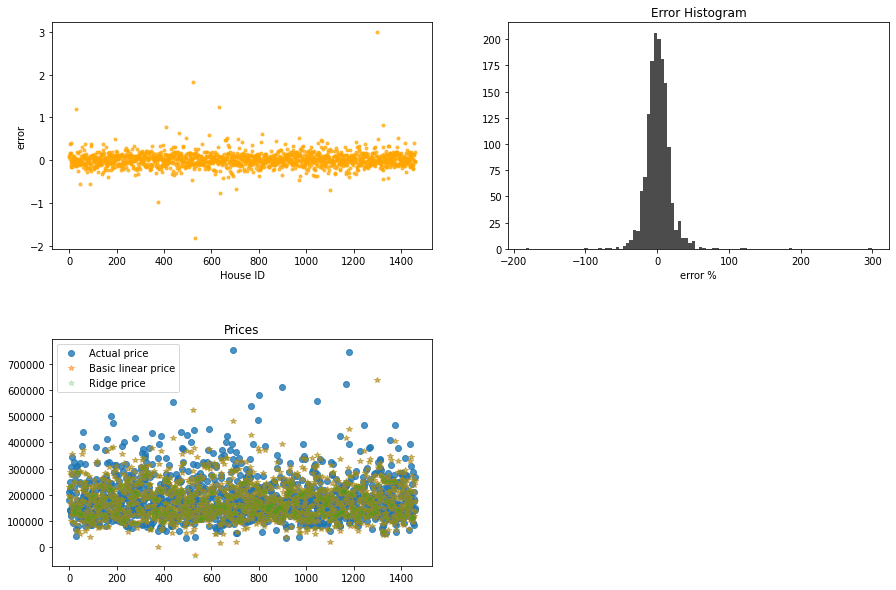

In [716]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(error1, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.xlabel('House ID')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(error1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, 'o', alpha = 0.8, label = 'Actual price')
plt.plot(x1_price, '*', alpha = 0.5, label = 'Basic linear price')
plt.plot(ridge_price, '*', alpha = 0.2, label = 'Ridge price')
plt.title('Prices')
plt.legend();

### Notice that the min is negative. We may remove that entry and see what happens (certainly not the best thing to do)

In [717]:
np.sort(x1_price)[:5]

array([-32711.25228451,    654.75855303,  13292.17627701,  17974.71907434,
        18324.72934785])

In [718]:
x1_price.argmin()

533

In [719]:
np.sort(train1.SalePrice)[:5]

array([34900, 35311, 37900, 39300, 40000], dtype=int64)

In [720]:
y.argmin()

495

In [721]:
y_wo_min = y.drop(index=y.argmin())
y_wo_min.reset_index()

,index,SalePrice
0,0,208500
1,1,181500
2,2,223500
3,3,140000
4,4,250000
...,...,...
1454,1455,175000
1455,1456,210000
1456,1457,266500
1457,1458,142125


In [722]:
y_wo_min[493:497] #We lost index 495 with the negative value

493    155000
494     91300
496    430000
497    184000
Name: SalePrice, dtype: int64

In [723]:
y_wo_min.min()

35311

In [724]:
x1_wo_min = np.delete(x1_price, x1_price.argmin())

In [725]:
error1 = (x1_wo_min - y_wo_min)/y_wo_min
abs_err = abs(x1_wo_min - y_wo_min)/y_wo_min
print(f'average error: {round(error1.mean()*100, 1)} %')
print(f'min error: {round(abs_err.min()*100, 4)}%, in house {abs_err.argmin()}' )
print(f'max error: {round(error1.max()*100, 1)}%, in house {error1.argmax()}' )

average error: 1.9 %
min error: 0.0024%, in house 618
max error: 339.1%, in house 527


In [726]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y_wo_min,x1_wo_min)))
print('R^2: % 1.3f' % r2_score(y_wo_min,x1_wo_min))

RMSE:  39016
R^2:  0.758


The error increased and the $R^2$ decreased, so it wasn't a good idea.

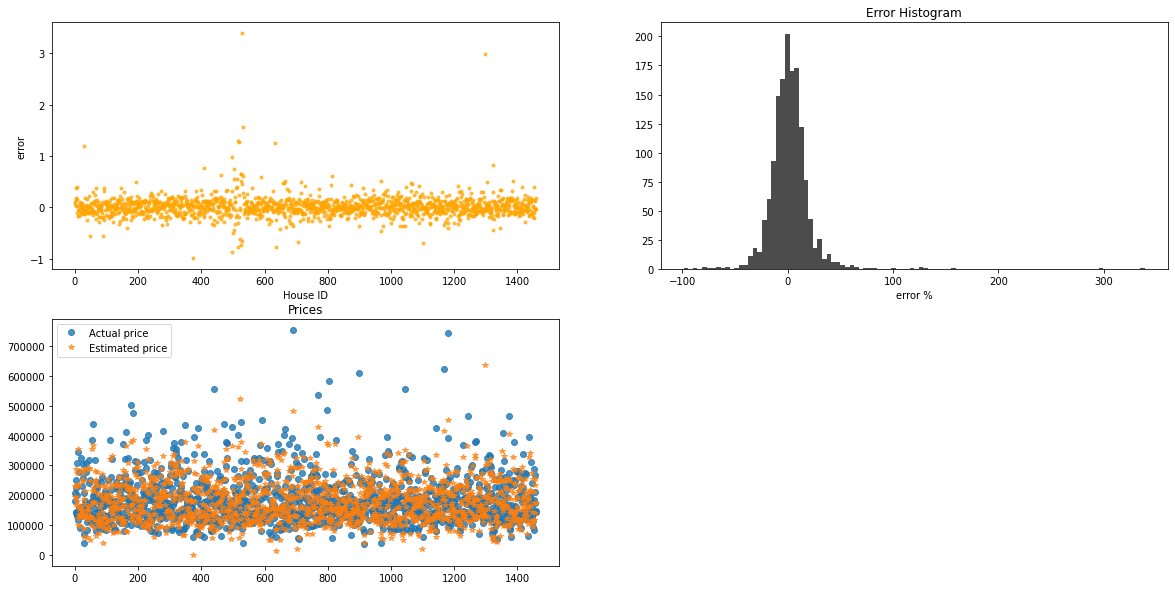

In [727]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(error1, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.xlabel('House ID')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(error1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y_wo_min, 'o', alpha = 0.8, label = 'Actual price')
plt.plot(x1_wo_min, '*', alpha = 0.7, label = 'Estimated price')#, 'o')
plt.title('Prices')
plt.legend();

So we note that the removed value wreaked havoc around him.

# Major SalePrice correlations

Let's constrain to the most correlated variables with the sale price.

In [728]:
def corrls(v,data=x1):
    big_corr_nums = []
    big_corr_cols = list()
    corr_dict = dict()
    for col in data.columns:
        corr = data[col].corr(y)
        if corr >= v:
            corr_dict[corr] = col
            #print(col, "\t", corr)
            big_corr_nums.append(corr)
    big_corr_nums.sort(reverse=True)
    for i in big_corr_nums:
        big_corr_cols.append(corr_dict[i])
        print(corr_dict[i],'\t',i) 
    del(big_corr_nums, corr_dict)
    
    return big_corr_cols

In [729]:
X = train1[corrls(-0.13)]

OverallQual 	 0.7909816005838052
GrLivArea 	 0.7086244776126521
ExterQual 	 0.6826392416562593
KitchenQual 	 0.6595997207286625
GarageCars 	 0.6404091972583522
GarageArea 	 0.6234314389183616
TotalBsmtSF 	 0.6135805515591954
1stFlrSF 	 0.6058521846919145
FullBath 	 0.5606637627484456
TotRmsAbvGrd 	 0.5337231555820281
YearBuilt 	 0.5228973328794968
YearRemodAdd 	 0.5071009671113862
Fireplaces 	 0.46692883675152796
HeatingQC 	 0.4276487073988035
BsmtFinSF1 	 0.3864198062421531
WoodDeckSF 	 0.3244134445681296
2ndFlrSF 	 0.3193338028320677
OpenPorchSF 	 0.3158562271160552
HalfBath 	 0.2841076755947825
LotArea 	 0.2638433538714056
CentralAir 	 0.2513281638401551
BsmtFullBath 	 0.22712223313149438
BsmtUnfSF 	 0.2144791055469689
BedroomAbvGr 	 0.16821315430074002
ScreenPorch 	 0.11144657114291115
PoolArea 	 0.09240354949187314
MoSold 	 0.046432245223819356
3SsnPorch 	 0.04458366533574843
ExterCond 	 0.018899118482413036
BsmtFinSF2 	 -0.011378121450215137
BsmtHalfBath 	 -0.01684415429735901
Mi

The lowest correlation is -0.1359073708421411 for `KitchenAbvGr`

In [730]:
X

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,HeatingQC,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,ExterCond,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch
0,7,1710,8.0,8.0,2,548,856,856,2,8,2003,2003,0,10.0,706,0,854,61,1,8450,1.0,1,150,3,0,0,2,0,6.0,0,0,0,0,2008,5,60,0
1,6,1262,6.0,6.0,2,460,1262,1262,2,6,1976,1976,1,10.0,978,298,0,0,0,9600,1.0,0,284,3,0,0,5,0,6.0,0,1,0,0,2007,8,20,0
2,7,1786,8.0,8.0,2,608,920,920,2,6,2001,2002,1,10.0,486,0,866,42,1,11250,1.0,1,434,3,0,0,9,0,6.0,0,0,0,0,2008,5,60,0
3,7,1717,6.0,8.0,3,642,756,961,1,7,1915,1970,1,8.0,216,0,756,35,0,9550,1.0,1,540,3,0,0,2,0,6.0,0,0,0,0,2006,5,70,272
4,8,2198,8.0,8.0,3,836,1145,1145,2,9,2000,2000,1,10.0,655,192,1053,84,1,14260,1.0,1,490,4,0,0,12,0,6.0,0,0,0,0,2008,5,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,6.0,6.0,2,460,953,953,2,7,1999,2000,1,10.0,0,0,694,40,1,7917,1.0,0,953,3,0,0,8,0,6.0,0,0,0,0,2007,5,60,0
1456,6,2073,6.0,6.0,2,500,1542,2073,2,7,1978,1988,2,6.0,790,349,0,0,0,13175,1.0,1,589,3,0,0,2,0,6.0,163,0,0,0,2010,6,20,0
1457,7,2340,10.0,8.0,1,252,1152,1188,2,9,1941,2006,2,10.0,275,0,1152,60,0,9042,1.0,0,877,4,0,0,5,0,8.0,0,0,2500,0,2010,9,70,0
1458,5,1078,6.0,8.0,1,240,1078,1078,1,5,1950,1996,0,8.0,49,366,0,0,0,9717,1.0,1,0,2,0,0,4,0,6.0,1029,0,0,0,2010,6,20,112


In [731]:
ls = LinearRegression()
ls.fit(X,y)

LinearRegression()

In [732]:
y_fit = (X.dot(ls.coef_) + ls.intercept_)
y_fit

0       230420.596655
1       195513.561455
2       229049.189115
3       192692.341492
4       285878.821652
            ...      
1455    172249.634991
1456    234551.137849
1457    252739.893538
1458    139822.926058
1459    175911.175073
Length: 1460, dtype: float64

`ls.predict(X)` is almost the same as `y_fit = (X.dot(ls.coef_) + ls.intercept_)`

In [733]:
ls.predict(X)

array([230420.59665507, 195513.56145534, 229049.18911546, ...,
       252739.89353824, 139822.92605824, 175911.17507251])

but the means are slightly different, and we get an array instead

### These are the sale prices obtained through multilinear regression of the most correlated parameters with the price, let's compare with the actual prices:

In [734]:
train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [735]:
y_fit.mean()

180921.1958904106

In [736]:
y.mean()

180921.19589041095

Sale Price average: $180,921.2 USD

In [737]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [738]:
y_fit.describe()

count      1460.000000
mean     180921.195890
std       71894.130893
min      -33220.718276
25%      126796.392086
50%      171563.688161
75%      226310.985944
max      637279.195306
dtype: float64

We see that the min and max are quite different compared to the actual values

In [739]:
ans = (y_fit - y) / y

In [740]:
np.mean(ans)*100

1.2956341692141287

In [741]:
X.shape

(1460, 37)

Next we present a table for the different correlation tolerances

| Min. Corr. | Error | Columns
|:-:|:-:|:-:|
| -0.14 | 1.300 | 39 |
| -0.13 | 1.295 | 38 |
| -0.12 | 1.296 | 37 |
| -0.08 | 1.323 | 36 |
| -0.05 | 1.485 | 35 |
| 0.00 | 1.495 | 29 |
| 0.25 | 1.526 | 21 |
| 0.50 | 1.91 | 12 |
| 0.75 | 4.66 | 1 |

The minimun error lies almost at the lowest correlation, but not quite. From -0.12 to -0.09 we get the same value, as we have the same number of columns.

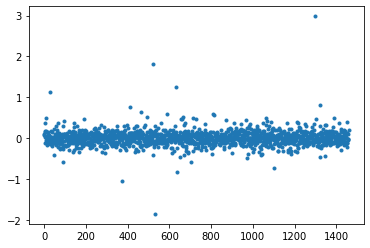

In [742]:
plt.plot(ans, '.');

And now we have our results

In [743]:
train_pred = pd.DataFrame()
train_pred['Id'] = train.Id
train_pred['SalePrice'] = y_fit
train_pred

,Id,SalePrice
0,1,230420.596655
1,2,195513.561455
2,3,229049.189115
3,4,192692.341492
4,5,285878.821652
...,...,...
1455,1456,172249.634991
1456,1457,234551.137849
1457,1458,252739.893538
1458,1459,139822.926058


Let's compare:

In [744]:
pd.DataFrame(train[['Id','SalePrice']])

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


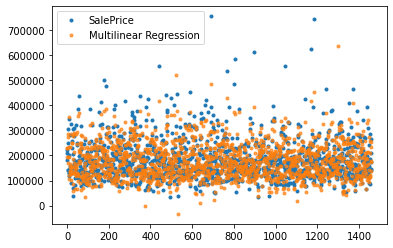

In [745]:
plt.plot(train.SalePrice, '.', label='SalePrice')
plt.plot(y_fit, '.', alpha=0.7, label='Multilinear Regression')
plt.legend();

In [746]:
print('RMSE: % 1.f' %np.sqrt(mean_squared_error(y,y_fit)))
print('R^2: % 1.3f' % r2_score(y,y_fit))

RMSE:  33787
R^2:  0.819


In [747]:
#Normalized RMSE by the mean
np.sqrt(mean_squared_error(y,y_fit)) / y.mean()

0.18674993110832183

In [748]:
#Normalized RMSE by the range
np.sqrt(mean_squared_error(y,y_fit)) / ( y.max() - y.min() )

0.04691990122006589

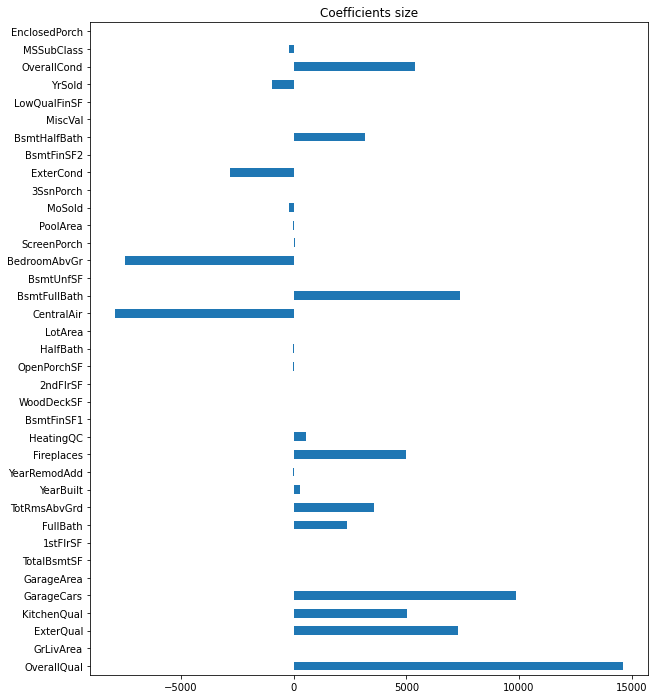

In [749]:
coefs = pd.DataFrame(index = X.columns, data = ls.coef_,columns=['Coefficients'])
# coefs.sort_values('Coefficients').plot.barh(legend=False, title='Coefficients size', figsize=(10,5));
coefs.plot.barh(legend=False, title='Coefficients size', figsize=(10,X.shape[1]//3));

In [750]:
X

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,HeatingQC,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,ExterCond,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch
0,7,1710,8.0,8.0,2,548,856,856,2,8,2003,2003,0,10.0,706,0,854,61,1,8450,1.0,1,150,3,0,0,2,0,6.0,0,0,0,0,2008,5,60,0
1,6,1262,6.0,6.0,2,460,1262,1262,2,6,1976,1976,1,10.0,978,298,0,0,0,9600,1.0,0,284,3,0,0,5,0,6.0,0,1,0,0,2007,8,20,0
2,7,1786,8.0,8.0,2,608,920,920,2,6,2001,2002,1,10.0,486,0,866,42,1,11250,1.0,1,434,3,0,0,9,0,6.0,0,0,0,0,2008,5,60,0
3,7,1717,6.0,8.0,3,642,756,961,1,7,1915,1970,1,8.0,216,0,756,35,0,9550,1.0,1,540,3,0,0,2,0,6.0,0,0,0,0,2006,5,70,272
4,8,2198,8.0,8.0,3,836,1145,1145,2,9,2000,2000,1,10.0,655,192,1053,84,1,14260,1.0,1,490,4,0,0,12,0,6.0,0,0,0,0,2008,5,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,6.0,6.0,2,460,953,953,2,7,1999,2000,1,10.0,0,0,694,40,1,7917,1.0,0,953,3,0,0,8,0,6.0,0,0,0,0,2007,5,60,0
1456,6,2073,6.0,6.0,2,500,1542,2073,2,7,1978,1988,2,6.0,790,349,0,0,0,13175,1.0,1,589,3,0,0,2,0,6.0,163,0,0,0,2010,6,20,0
1457,7,2340,10.0,8.0,1,252,1152,1188,2,9,1941,2006,2,10.0,275,0,1152,60,0,9042,1.0,0,877,4,0,0,5,0,8.0,0,0,2500,0,2010,9,70,0
1458,5,1078,6.0,8.0,1,240,1078,1078,1,5,1950,1996,0,8.0,49,366,0,0,0,9717,1.0,1,0,2,0,0,4,0,6.0,1029,0,0,0,2010,6,20,112


### Although the parameters are in order of correlation, the coefficients of the ones with big values are shrinked, except for `TotRmsAbvGrd` whose max value is 14:

In [751]:
train.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [752]:
X1 = X.copy()
X1['SalePrice'] = train.SalePrice

In [753]:
%whos

Variable                   Type                Data/Info
--------------------------------------------------------
Bsmt                       DataFrame                 SalePrice  TotalBsm<...>n[1460 rows x 12 columns]
Lasso                      ABCMeta             <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression           ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
Ridge                      ABCMeta             <class 'sklearn.linear_model._ridge.Ridge'>
X                          DataFrame                 OverallQual  GrLivA<...>n[1460 rows x 37 columns]
X1                         DataFrame                 OverallQual  GrLivA<...>n[1460 rows x 38 columns]
X_test                     DataFrame                 OverallQual  GrLivA<...>n[1459 rows x 29 columns]
X_test1                    DataFrame                 OverallQual  GrLivA<...>n[1459 rows x 29 columns]
abs_err                    Series              0       0.107697\n1      <.

# Test Set
We'll use now the test set and give it the same treatment as the train set in order to estimate the sale prices with our trained model

In [754]:
test = pd.read_csv('https://raw.githubusercontent.com/jenarofv/house-prices/main/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [755]:
sample = pd.read_csv('https://raw.githubusercontent.com/jenarofv/house-prices/main/sample_submission.csv')
ys = sample.SalePrice
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [756]:
test_non_num_info = []
for col in test.columns:
    if(test[col].dtype == object):
        test_non_num_info.append(col)
len(test_non_num_info)

43

In [757]:
scal_test = []
for col in test_non_num_info:
    if test[col][1] in ['Ex', 'Gd', 'Av', 'Mn', 'No', 'TA', 'Fa', 'Po', 'NA',
                        'GLQ', 'ALQ', 'BLQ', 'LwQ', 'Rec', 'Unf'] or col == 'CentralAir' or col == 'FireplaceQu':
        scal_test.append(col)
print(scal_test)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']


In [758]:
test1 = test.copy()

In [759]:
for i in range(len(test)):
    for col in scal_test:
        test1[col][i] = to_numbers(test[col][i], col)

<ipython-input-759-9ca656130d81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1[col][i] = to_numbers(test[col][i], col)


In [760]:
test1[scal_test]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,6,6,6,6,2,8,4,6,1,6,NaN,2,6,6
1,6,6,6,6,2,8,2,6,1,8,NaN,2,6,6
2,6,6,8,6,2,10,2,8,1,6,6,10,6,6
3,6,6,6,6,2,10,2,10,1,8,8,10,6,6
4,8,6,8,6,2,8,2,10,1,8,NaN,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6,6,6,6,2,2,2,8,1,6,NaN,NaN,NaN,NaN
1455,6,6,6,6,2,8,2,6,1,6,NaN,2,6,6
1456,6,6,6,6,2,8,2,10,1,6,6,2,6,6
1457,6,6,8,6,6,10,2,6,1,6,NaN,NaN,NaN,NaN


In [761]:
for col in scal_test:
    test1[col] = test1[col].astype('float')

In [762]:
test1.select_dtypes('float')

,LotFrontage,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,BsmtFullBath,BsmtHalfBath,KitchenQual,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,80.0,0.0,6.0,6.0,6.0,6.0,2.0,8.0,468.0,4.0,144.0,270.0,882.0,6.0,1.0,0.0,0.0,6.0,NaN,1961.0,2.0,1.0,730.0,6.0,6.0
1,81.0,108.0,6.0,6.0,6.0,6.0,2.0,8.0,923.0,2.0,0.0,406.0,1329.0,6.0,1.0,0.0,0.0,8.0,NaN,1958.0,2.0,1.0,312.0,6.0,6.0
2,74.0,0.0,6.0,6.0,8.0,6.0,2.0,10.0,791.0,2.0,0.0,137.0,928.0,8.0,1.0,0.0,0.0,6.0,6.0,1997.0,10.0,2.0,482.0,6.0,6.0
3,78.0,20.0,6.0,6.0,6.0,6.0,2.0,10.0,602.0,2.0,0.0,324.0,926.0,10.0,1.0,0.0,0.0,8.0,8.0,1998.0,10.0,2.0,470.0,6.0,6.0
4,43.0,0.0,8.0,6.0,8.0,6.0,2.0,8.0,263.0,2.0,0.0,1017.0,1280.0,10.0,1.0,0.0,0.0,8.0,NaN,1992.0,6.0,2.0,506.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,6.0,6.0,6.0,6.0,2.0,2.0,0.0,2.0,0.0,546.0,546.0,8.0,1.0,0.0,0.0,6.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1455,21.0,0.0,6.0,6.0,6.0,6.0,2.0,8.0,252.0,2.0,0.0,294.0,546.0,6.0,1.0,0.0,0.0,6.0,NaN,1970.0,2.0,1.0,286.0,6.0,6.0
1456,160.0,0.0,6.0,6.0,6.0,6.0,2.0,8.0,1224.0,2.0,0.0,0.0,1224.0,10.0,1.0,1.0,0.0,6.0,6.0,1960.0,2.0,2.0,576.0,6.0,6.0
1457,62.0,0.0,6.0,6.0,8.0,6.0,6.0,10.0,337.0,2.0,0.0,575.0,912.0,6.0,1.0,0.0,1.0,6.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [763]:
pd.set_option('display.max_rows', 30)
test1.select_dtypes('float').isna().sum()

LotFrontage     227
MasVnrArea       15
ExterQual         0
ExterCond         0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
HeatingQC         0
CentralAir        0
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
FireplaceQu     730
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
dtype: int64

In [764]:
test1.select_dtypes('float').isna().any().sum()

21

Unfortunately, there are a lot more NaNs in the test set than in the train set

In [765]:
pd.set_option('display.max_rows', 30)
train1.select_dtypes('float').isna().sum()

LotFrontage     259
MasVnrArea        8
ExterQual         0
ExterCond         0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
HeatingQC         0
CentralAir        0
KitchenQual       0
FireplaceQu     690
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [766]:
train1.select_dtypes('float').isna().any().sum()

12

In [767]:
pd.set_option('display.max_rows', 10)

## Test set linear regression

First, we prepare th test set with only numerical values and w/o NaNs

In [768]:
x_test = test1.copy()

# We exclude any non.numerical value, and the sale price, so we can perform a Linear Regression.
x_test = x_test.select_dtypes(exclude='object')

# We also drop any column with a NaN.
x_test.dropna(axis = 1, inplace = True)

# Or we can convert NaNs to zeros
# x_test.replace(np.NaN, 0, inplace=True)

x_test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,6.0,6.0,6.0,1.0,896,0,0,896,1,0,2,1,5,0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,6.0,6.0,6.0,1.0,1329,0,0,1329,1,1,3,1,6,0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,6.0,6.0,8.0,1.0,928,701,0,1629,2,1,3,1,6,1,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,6.0,6.0,10.0,1.0,926,678,0,1604,2,1,3,1,7,1,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,8.0,6.0,10.0,1.0,1280,0,0,1280,2,0,2,1,5,0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,6.0,6.0,8.0,1.0,546,546,0,1092,1,1,3,1,5,0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,6.0,6.0,6.0,1.0,546,546,0,1092,1,1,3,1,6,0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,6.0,6.0,10.0,1.0,1224,0,0,1224,1,0,4,1,7,1,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,6.0,6.0,6.0,1.0,970,0,0,970,1,0,3,1,6,0,80,32,0,0,0,0,700,7,2006


Just to be sure, we perform once again the linear regression with the __train__ set

In [769]:
X = train1[corrls(0)]

OverallQual 	 0.7909816005838052
GrLivArea 	 0.7086244776126521
ExterQual 	 0.6826392416562593
KitchenQual 	 0.6595997207286625
GarageCars 	 0.6404091972583522
GarageArea 	 0.6234314389183616
TotalBsmtSF 	 0.6135805515591954
1stFlrSF 	 0.6058521846919145
FullBath 	 0.5606637627484456
TotRmsAbvGrd 	 0.5337231555820281
YearBuilt 	 0.5228973328794968
YearRemodAdd 	 0.5071009671113862
Fireplaces 	 0.46692883675152796
HeatingQC 	 0.4276487073988035
BsmtFinSF1 	 0.3864198062421531
WoodDeckSF 	 0.3244134445681296
2ndFlrSF 	 0.3193338028320677
OpenPorchSF 	 0.3158562271160552
HalfBath 	 0.2841076755947825
LotArea 	 0.2638433538714056
CentralAir 	 0.2513281638401551
BsmtFullBath 	 0.22712223313149438
BsmtUnfSF 	 0.2144791055469689
BedroomAbvGr 	 0.16821315430074002
ScreenPorch 	 0.11144657114291115
PoolArea 	 0.09240354949187314
MoSold 	 0.046432245223819356
3SsnPorch 	 0.04458366533574843
ExterCond 	 0.018899118482413036


In [770]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [771]:
y_fit = (X.dot(lr.coef_) + lr.intercept_)
y_fit

0       225547.093026
1       174562.271897
2       225226.890345
3       199937.050859
4       285630.033806
            ...      
1455    169019.424788
1456    226365.745628
1457    248786.298818
1458    138490.300261
1459    170087.251539
Length: 1460, dtype: float64

In [772]:
X.shape

(1460, 29)

Then we choose some threshold for the correlations in order to have the same number of columns as in the trained model

In [773]:
X_test = test1[corrls(0.01)]
X_test.shape

OverallQual 	 0.7909816005838052
GrLivArea 	 0.7086244776126521
ExterQual 	 0.6826392416562593
KitchenQual 	 0.6595997207286625
GarageCars 	 0.6404091972583522
GarageArea 	 0.6234314389183616
TotalBsmtSF 	 0.6135805515591954
1stFlrSF 	 0.6058521846919145
FullBath 	 0.5606637627484456
TotRmsAbvGrd 	 0.5337231555820281
YearBuilt 	 0.5228973328794968
YearRemodAdd 	 0.5071009671113862
Fireplaces 	 0.46692883675152796
HeatingQC 	 0.4276487073988035
BsmtFinSF1 	 0.3864198062421531
WoodDeckSF 	 0.3244134445681296
2ndFlrSF 	 0.3193338028320677
OpenPorchSF 	 0.3158562271160552
HalfBath 	 0.2841076755947825
LotArea 	 0.2638433538714056
CentralAir 	 0.2513281638401551
BsmtFullBath 	 0.22712223313149438
BsmtUnfSF 	 0.2144791055469689
BedroomAbvGr 	 0.16821315430074002
ScreenPorch 	 0.11144657114291115
PoolArea 	 0.09240354949187314
MoSold 	 0.046432245223819356
3SsnPorch 	 0.04458366533574843
ExterCond 	 0.018899118482413036


(1459, 29)

In [893]:
y_test = (X_test.dot(lr.coef_) + lr.intercept_)
y_test

0       118692.017919
1       171880.923632
2       169573.347741
3       199438.803008
4       217078.436379
            ...      
1454     67318.559649
1455     84094.730371
1456    175101.891930
1457    101338.780464
1458    232631.059207
Length: 1459, dtype: float64

In [775]:
y_test.describe()

count      1455.000000
mean     178472.685792
std       71382.536379
min          -7.029956
25%      128765.638218
50%      165409.689703
75%      221691.620255
max      627428.170618
dtype: float64

In [776]:
error1 = (y_test - ys)/ys
abs_err = abs(y_test - ys)/ys
print(f'average error: {round(error1.mean()*100, 1)} %')
print(f'min error: {round(abs_err.min()*100, 4)}%, in house {abs_err.argmin()}' )
print(f'max error: {round(error1.max()*100, 1)}%, in house {error1.argmax()}' )

average error: -0.5 %
min error: 0.0289%, in house 949
max error: 171.8%, in house 1089


In [896]:
Xna = X_test.dropna()

In [897]:
lr.predict(Xna)

array([118692.01791863, 171880.92363171, 169573.34774094, ...,
       175101.89192954, 101338.78046384, 232631.05920739])

In [903]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y[:-5], lr.predict(Xna))))
print('R^2: % 1.3f' % r2_score(y[:-5], lr.predict(Xna)))

RMSE:  105956
R^2: -0.776


In [778]:
y_test.argmin(), y_test[y_test.argmin()]

(756, -7.029955756850541)

In [779]:
abs_err.argmin(), y_test[abs_err.argmin()], y_test.mean()

(949, 192655.98560676863, 178472.68579169427)

In [780]:
y_test.argmax(), y_test[y_test.argmax()]

(1089, 627428.1706177219)

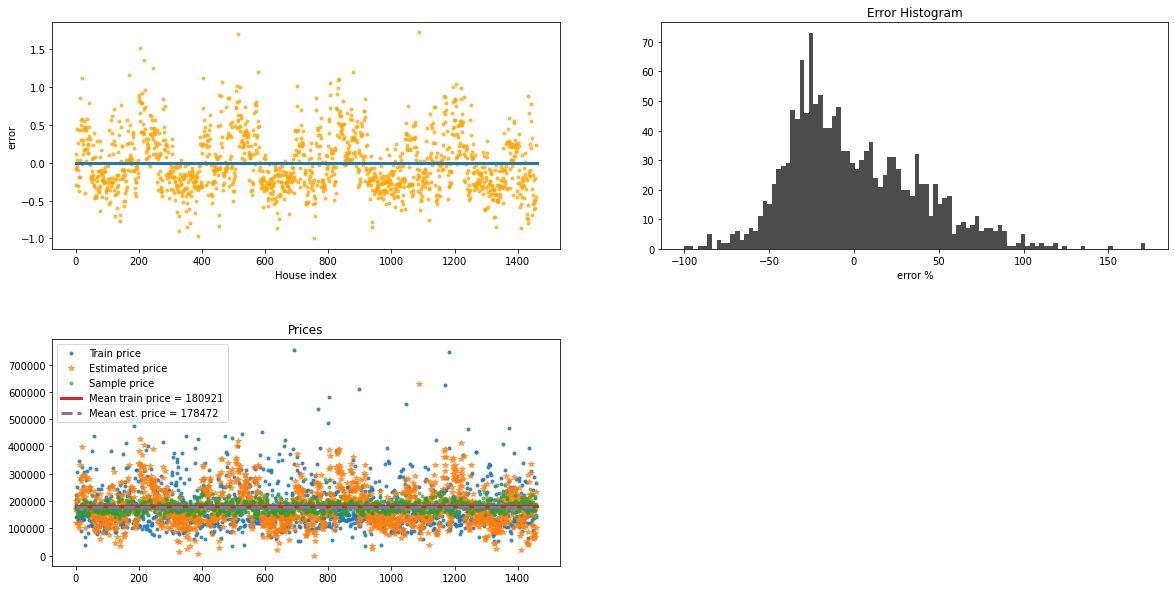

In [803]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(error1, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.plot([0,len(y)], [0, 0], lw=3)
plt.xlabel('House index')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(error1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, '.', alpha = 0.8, label = 'Train price')
plt.plot(y_test, '*', alpha = 0.7, label = 'Estimated price')
plt.plot(ys, '.', alpha = 0.6, label = 'Sample price')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean train price = {int(y.mean())}')
plt.plot([0,len(y_test)], [y_test.mean(), y_test.mean()], '--', lw=3, label=f'Mean est. price = {int(y_test.mean())}')
plt.title('Prices')
plt.legend();

## Test set ridge regression

In [782]:
ridge = Ridge(alpha=0.5)
ridge.fit(X, y)

Ridge(alpha=0.5)

In [783]:
X.shape

(1460, 29)

In [784]:
X_test1.shape

(1459, 29)

In [785]:
y_fit_r = (X_test1.dot(ridge.coef_) + ridge.intercept_)
y_fit_r

0       118733.078949
1       171894.118262
2       169588.088509
3       199446.313645
4       217074.024668
            ...      
1454     67338.880399
1455     84108.502299
1456    175107.007479
1457    101353.787002
1458    232617.517021
Length: 1459, dtype: float64

In [786]:
y_fit_r.describe()

count      1455.000000
mean     178472.773020
std       71379.762883
min          -0.604139
25%      128773.643889
50%      165401.520538
75%      221691.286657
max      627462.190335
dtype: float64

In [787]:
error1 = (y_fit_r - ys)/ys
abs_err = abs(y_fit_r - ys)/ys
print(f'average error: {round(error1.mean()*100, 1)} %')
print(f'min error: {round(abs_err.min()*100, 4)}%, in house {abs_err.argmin()}' )
print(f'max error: {round(error1.max()*100, 1)}%, in house {error1.argmax()}' )

average error: -0.5 %
min error: 0.0221%, in house 949
max error: 171.8%, in house 1089


In [904]:
Yna = y_fit_r.dropna()

In [906]:
Yna

0       118733.078949
1       171894.118262
2       169588.088509
3       199446.313645
4       217074.024668
            ...      
1454     67338.880399
1455     84108.502299
1456    175107.007479
1457    101353.787002
1458    232617.517021
Length: 1455, dtype: float64

In [908]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y[:-5], Yna)))
print('R^2: % 1.3f' % r2_score(y[:-5], Yna))

RMSE:  105955
R^2: -0.776


In [789]:
y_fit_r.argmax(), y_fit_r[y_fit_r.argmax()]

(1089, 627462.1903351342)

In [790]:
y_fit_r.argmin(), y_fit_r[y_fit_r.argmin()]

(756, -0.604139382718131)

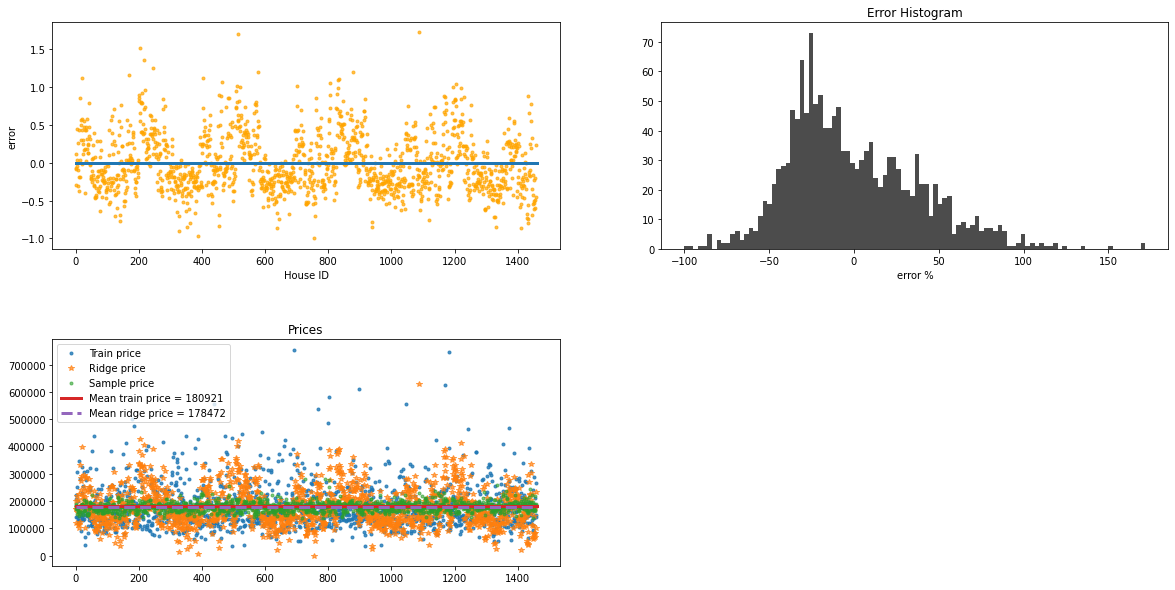

In [802]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(error1, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.plot([0,len(y)], [0, 0], lw=3)
plt.xlabel('House index')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(error1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, '.', alpha = 0.8, label = 'Train price')
plt.plot(y_fit_r, '*', alpha = 0.7, label = 'Ridge price')
plt.plot(ys, '.', alpha = 0.6, label = 'Sample price')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean train price = {int(y.mean())}')
plt.plot([0,len(y_fit_r)], [y_fit_r.mean(), y_fit_r.mean()], '--', lw=3, label=f'Mean ridge price = {int(y_fit_r.mean())}')
plt.title('Prices')
plt.legend();

In [792]:
sample.SalePrice.mean()

179183.91824266256

# Polynomial fit

As we know, a polynomial fit is a special case of multilinear regression.
We will now adapt our data to use a polynomial fit.
First, we need to remove any categorical value.

In [860]:
x_polyfit = x1.copy()

for col in x_polyfit.columns:
    col2 = col + '**2'
    x_polyfit[col2] = x_polyfit[col]**2

x_polyfit

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass**2,LotArea**2,OverallQual**2,OverallCond**2,YearBuilt**2,YearRemodAdd**2,ExterQual**2,ExterCond**2,BsmtFinSF1**2,BsmtFinSF2**2,BsmtUnfSF**2,TotalBsmtSF**2,HeatingQC**2,CentralAir**2,1stFlrSF**2,2ndFlrSF**2,LowQualFinSF**2,GrLivArea**2,BsmtFullBath**2,BsmtHalfBath**2,FullBath**2,HalfBath**2,BedroomAbvGr**2,KitchenAbvGr**2,KitchenQual**2,TotRmsAbvGrd**2,Fireplaces**2,GarageCars**2,GarageArea**2,WoodDeckSF**2,OpenPorchSF**2,EnclosedPorch**2,3SsnPorch**2,ScreenPorch**2,PoolArea**2,MiscVal**2,MoSold**2,YrSold**2
0,60,8450,7,5,2003,2003,8.0,6.0,706,0,150,856,10.0,1.0,856,854,0,1710,1,0,2,1,3,1,8.0,8,0,2,548,0,61,0,0,0,0,0,2,2008,3600,71402500,49,25,4012009,4012009,64.0,36.0,498436,0,22500,732736,100.0,1.0,732736,729316,0,2924100,1,0,4,1,9,1,64.0,64,0,4,300304,0,3721,0,0,0,0,0,4,4032064
1,20,9600,6,8,1976,1976,6.0,6.0,978,0,284,1262,10.0,1.0,1262,0,0,1262,0,1,2,0,3,1,6.0,6,1,2,460,298,0,0,0,0,0,0,5,2007,400,92160000,36,64,3904576,3904576,36.0,36.0,956484,0,80656,1592644,100.0,1.0,1592644,0,0,1592644,0,1,4,0,9,1,36.0,36,1,4,211600,88804,0,0,0,0,0,0,25,4028049
2,60,11250,7,5,2001,2002,8.0,6.0,486,0,434,920,10.0,1.0,920,866,0,1786,1,0,2,1,3,1,8.0,6,1,2,608,0,42,0,0,0,0,0,9,2008,3600,126562500,49,25,4004001,4008004,64.0,36.0,236196,0,188356,846400,100.0,1.0,846400,749956,0,3189796,1,0,4,1,9,1,64.0,36,1,4,369664,0,1764,0,0,0,0,0,81,4032064
3,70,9550,7,5,1915,1970,6.0,6.0,216,0,540,756,8.0,1.0,961,756,0,1717,1,0,1,0,3,1,8.0,7,1,3,642,0,35,272,0,0,0,0,2,2006,4900,91202500,49,25,3667225,3880900,36.0,36.0,46656,0,291600,571536,64.0,1.0,923521,571536,0,2948089,1,0,1,0,9,1,64.0,49,1,9,412164,0,1225,73984,0,0,0,0,4,4024036
4,60,14260,8,5,2000,2000,8.0,6.0,655,0,490,1145,10.0,1.0,1145,1053,0,2198,1,0,2,1,4,1,8.0,9,1,3,836,192,84,0,0,0,0,0,12,2008,3600,203347600,64,25,4000000,4000000,64.0,36.0,429025,0,240100,1311025,100.0,1.0,1311025,1108809,0,4831204,1,0,4,1,16,1,64.0,81,1,9,698896,36864,7056,0,0,0,0,0,144,4032064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,6.0,6.0,0,0,953,953,10.0,1.0,953,694,0,1647,0,0,2,1,3,1,6.0,7,1,2,460,0,40,0,0,0,0,0,8,2007,3600,62678889,36,25,3996001,4000000,36.0,36.0,0,0,908209,908209,100.0,1.0,908209,481636,0,2712609,0,0,4,1,9,1,36.0,49,1,4,211600,0,1600,0,0,0,0,0,64,4028049
1456,20,13175,6,6,1978,1988,6.0,6.0,790,163,589,1542,6.0,1.0,2073,0,0,2073,1,0,2,0,3,1,6.0,7,2,2,500,349,0,0,0,0,0,0,2,2010,400,173580625,36,36,3912484,3952144,36.0,36.0,624100,26569,346921,2377764,36.0,1.0,4297329,0,0,4297329,1,0,4,0,9,1,36.0,49,4,4,250000,121801,0,0,0,0,0,0,4,4040100
1457,70,9042,7,9,1941,2006,10.0,8.0,275,0,877,1152,10.0,1.0,1188,1152,0,2340,0,0,2,0,4,1,8.0,9,2,1,252,0,60,0,0,0,0,2500,5,2010,4900,81757764,49,81,3767481,4024036,100.0,64.0,75625,0,769129,1327104,100.0,1.0,1411344,1327104,0,5475600,0,0,4,0,16,1,64.0,81,4,1,63504,0,3600,0,0,0,0,6250000,25,4040100
1458,20,9717,5,6,1950,1996,6.0,6.0,49,1029,0,1078,8.0,1.0,1078,0,0,1078,1,0,1,0,2,1,8.0,5,0,1,240,366,0,112,0,0,0,0,4,2010,400,94420089,25,36,3802500,3984016,36.0,36.0,2401,1058841,0,1162084,64.0,1.0,1162084,0,0,1162084,1,0,1,0,4,1,64.0,25,0,1,57600,133956,0,12544,0,0,0,0,16,4040100


In [861]:
pol1 = LinearRegression();

pol1.fit(x_polyfit, y)

pol_prices_1 = pol1.predict(x_polyfit)
pol_prices_1

array([216537.7656368 , 186120.90774822, 216690.0442909 , ...,
       245164.33808172, 140731.88051331, 158626.73370731])

In [862]:
pol_err1 = (pol_prices_1 - y)/y
pol_abs_err = abs(pol_prices_1 - y)/y
print(f'average error: {round(pol_err1.mean()*100, 1)} %')
print(f'min error: {round(pol_abs_err.min()*100, 4)}%, in house {pol_abs_err.argmin()}' )
print(f'max error: {round(pol_err1.max()*100, 1)}%, in house {pol_abs_err.argmax()}' )
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y,pol_prices_1)))
print('R^2: % 1.3f' % r2_score(y,pol_prices_1))

average error: 1.2 %
min error: 0.0124%, in house 561
max error: 178.8%, in house 523
RMSE:  26402
R^2:  0.889


The result is similar to the Linear Squares fit.

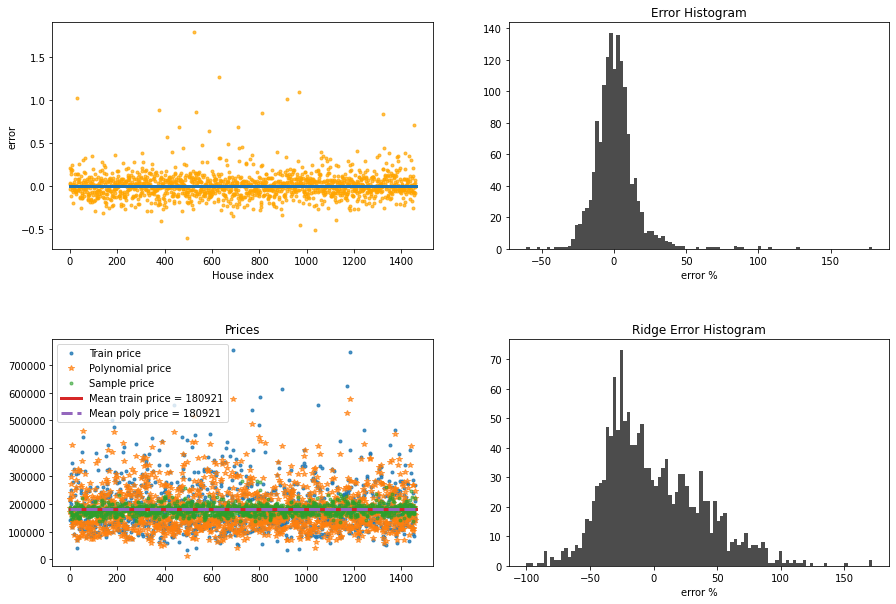

In [863]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(pol_err1, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.plot([0,len(y)], [0, 0], lw=3)
plt.xlabel('House index')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(pol_err1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, '.', alpha = 0.8, label = 'Train price')
# plt.plot(y_test, '*', alpha = 0.7, label = 'Linear price')
plt.plot(pol_prices_1, '*', alpha = 0.7, label = 'Polynomial price')
plt.plot(ys, '.', alpha = 0.6, label = 'Sample price')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean train price = {int(y.mean())}')
plt.plot([0,len(pol_prices_1)], [pol_prices_1.mean(), pol_prices_1.mean()], '--', lw=3, label=f'Mean poly price = {int(pol_prices_1.mean())}')
plt.title('Prices')
plt.legend();

plt.subplot(2, 2, 4)
plt.hist(error1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Ridge Error Histogram')
plt.xlabel('error %');

### If we take only the squares we have a slightly worse prediction

In [864]:
x_polyfit = x1.copy()

for col in x_polyfit.columns:
    x_polyfit[col] = x_polyfit[col]**2

x_polyfit

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3600,71402500,49,25,4012009,4012009,64.0,36.0,498436,0,22500,732736,100.0,1.0,732736,729316,0,2924100,1,0,4,1,9,1,64.0,64,0,4,300304,0,3721,0,0,0,0,0,4,4032064
1,400,92160000,36,64,3904576,3904576,36.0,36.0,956484,0,80656,1592644,100.0,1.0,1592644,0,0,1592644,0,1,4,0,9,1,36.0,36,1,4,211600,88804,0,0,0,0,0,0,25,4028049
2,3600,126562500,49,25,4004001,4008004,64.0,36.0,236196,0,188356,846400,100.0,1.0,846400,749956,0,3189796,1,0,4,1,9,1,64.0,36,1,4,369664,0,1764,0,0,0,0,0,81,4032064
3,4900,91202500,49,25,3667225,3880900,36.0,36.0,46656,0,291600,571536,64.0,1.0,923521,571536,0,2948089,1,0,1,0,9,1,64.0,49,1,9,412164,0,1225,73984,0,0,0,0,4,4024036
4,3600,203347600,64,25,4000000,4000000,64.0,36.0,429025,0,240100,1311025,100.0,1.0,1311025,1108809,0,4831204,1,0,4,1,16,1,64.0,81,1,9,698896,36864,7056,0,0,0,0,0,144,4032064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3600,62678889,36,25,3996001,4000000,36.0,36.0,0,0,908209,908209,100.0,1.0,908209,481636,0,2712609,0,0,4,1,9,1,36.0,49,1,4,211600,0,1600,0,0,0,0,0,64,4028049
1456,400,173580625,36,36,3912484,3952144,36.0,36.0,624100,26569,346921,2377764,36.0,1.0,4297329,0,0,4297329,1,0,4,0,9,1,36.0,49,4,4,250000,121801,0,0,0,0,0,0,4,4040100
1457,4900,81757764,49,81,3767481,4024036,100.0,64.0,75625,0,769129,1327104,100.0,1.0,1411344,1327104,0,5475600,0,0,4,0,16,1,64.0,81,4,1,63504,0,3600,0,0,0,0,6250000,25,4040100
1458,400,94420089,25,36,3802500,3984016,36.0,36.0,2401,1058841,0,1162084,64.0,1.0,1162084,0,0,1162084,1,0,1,0,4,1,64.0,25,0,1,57600,133956,0,12544,0,0,0,0,16,4040100


In [865]:
pol1 = LinearRegression();

pol1.fit(x_polyfit, y)

pol_prices_2 = pol1.predict(x_polyfit)
pol_prices_2

array([227115.9128499 , 180543.58279247, 229113.30061888, ...,
       266171.49856379, 128660.00081139, 179917.09994818])

In [866]:
pol_err2 = (pol_prices_2 - y)/y
pol_abs_err2 = abs(pol_prices_2 - y)/y
print(f'average error: {round(pol_err2.mean()*100, 1)} %')
print(f'min error: {round(pol_abs_err2.min()*100, 4)}%, in house {pol_abs_err2.argmin()}' )
print(f'max error: {round(pol_err2.max()*100, 1)}%, in house {pol_abs_err2.argmax()}' )
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y, pol_prices_2)))
print('R^2: % 1.3f' % r2_score(y, pol_prices_2))

average error: 1.7 %
min error: 0.053%, in house 1150
max error: 184.4%, in house 523
RMSE:  31797
R^2:  0.840


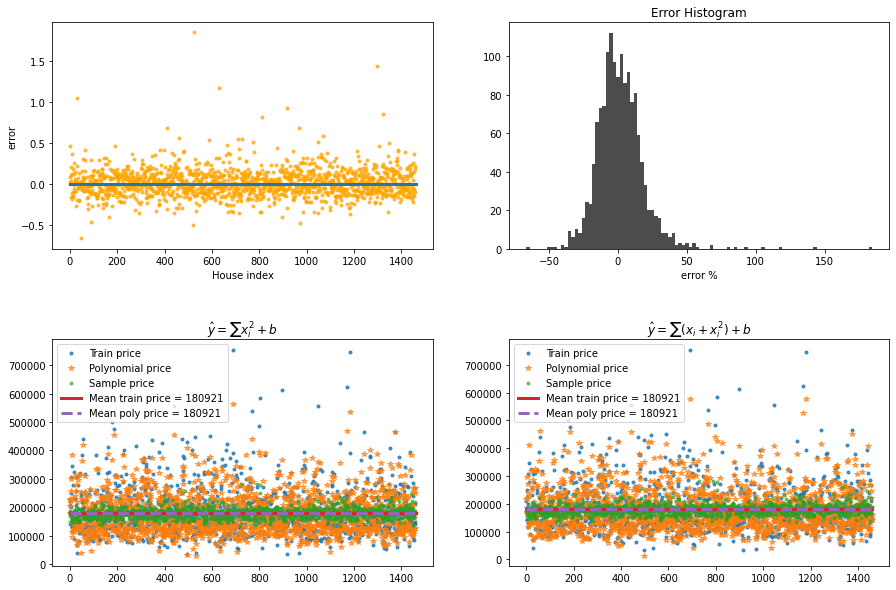

In [867]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(pol_err2, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.plot([0,len(y)], [0, 0], lw=3)
plt.xlabel('House index')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(pol_err2*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, '.', alpha = 0.8, label = 'Train price')
# plt.plot(y_test, '*', alpha = 0.7, label = 'Linear price')
plt.plot(pol_prices_2, '*', alpha = 0.7, label = 'Polynomial price')
plt.plot(ys, '.', alpha = 0.6, label = 'Sample price')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean train price = {int(y.mean())}')
plt.plot([0,len(pol_prices_2)], [pol_prices_2.mean(), pol_prices_2.mean()], '--', lw=3, label=f'Mean poly price = {int(pol_prices_1.mean())}')
plt.title('$\hat{y} = \sum x_i^2 + b$')
plt.legend();

plt.subplot(2, 2, 4)
plt.plot(y, '.', alpha = 0.8, label = 'Train price')
# plt.plot(y_test, '*', alpha = 0.7, label = 'Linear price')
plt.plot(pol_prices_1, '*', alpha = 0.7, label = 'Polynomial price')
plt.plot(ys, '.', alpha = 0.6, label = 'Sample price')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean train price = {int(y.mean())}')
plt.plot([0,len(pol_prices_1)], [pol_prices_1.mean(), pol_prices_1.mean()], '--', lw=3, label=f'Mean poly price = {int(pol_prices_1.mean())}')
plt.title('$\hat{y} = \sum (x_i + x_i^2) + b$')
plt.legend();

### Let's take a look at how our polynomial predict the prices if it had degree 3.

In [881]:
x_pol3 = x1.copy()

for col in x_polyfit.columns:
    col2 = col + '**2'
    col3 = col + '**3'
    x_pol3[col2] = x_polyfit[col] ** 2
    x_pol3[col3] = x_polyfit[col] ** 3

pol3 = LinearRegression();

pol3.fit(x_pol3, y)

pol_prices_3 = pol3.predict(x_pol3)
pol_prices_3

array([226341.03397155, 173303.08024788, 250032.60289049, ...,
       196637.61992908, 177156.29478109, 143151.11948884])

In [882]:
x_pol3

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass**2,MSSubClass**3,...,BsmtFullBath**2,BsmtFullBath**3,BsmtHalfBath**2,BsmtHalfBath**3,FullBath**2,FullBath**3,HalfBath**2,HalfBath**3,BedroomAbvGr**2,BedroomAbvGr**3,KitchenAbvGr**2,KitchenAbvGr**3,KitchenQual**2,KitchenQual**3,TotRmsAbvGrd**2,TotRmsAbvGrd**3,Fireplaces**2,Fireplaces**3,GarageCars**2,GarageCars**3,GarageArea**2,GarageArea**3,WoodDeckSF**2,WoodDeckSF**3,OpenPorchSF**2,OpenPorchSF**3,EnclosedPorch**2,EnclosedPorch**3,3SsnPorch**2,3SsnPorch**3,ScreenPorch**2,ScreenPorch**3,PoolArea**2,PoolArea**3,MiscVal**2,MiscVal**3,MoSold**2,MoSold**3,YrSold**2,YrSold**3
0,60,8450,7,5,2003,2003,8.0,6.0,706,0,150,856,10.0,1.0,856,854,0,1710,1,0,2,1,3,1,8.0,8,0,2,548,0,61,0,0,0,0,0,2,2008,12960000,46656000000,...,1,1,0,0,16,64,1,1,81,729,1,1,4096.0,262144.0,4096,262144,0,0,16,64,90182492416,27082163202494464,0,0,13845841,51520374361,0,0,0,0,0,0,0,0,0,0,16,64,16257540100096,-8235534128684728320
1,20,9600,6,8,1976,1976,6.0,6.0,978,0,284,1262,10.0,1.0,1262,0,0,1262,0,1,2,0,3,1,6.0,6,1,2,460,298,0,0,0,0,0,0,5,2007,160000,64000000,...,0,0,1,1,16,64,0,0,81,729,1,1,1296.0,46656.0,1296,46656,1,1,16,64,44774560000,9474296896000000,7886150416,700321701542464,0,0,0,0,0,0,0,0,0,0,0,0,625,15625,16225178746401,-8431161270576404815
2,60,11250,7,5,2001,2002,8.0,6.0,486,0,434,920,10.0,1.0,920,866,0,1786,1,0,2,1,3,1,8.0,6,1,2,608,0,42,0,0,0,0,0,9,2008,12960000,46656000000,...,1,1,0,0,16,64,1,1,81,729,1,1,4096.0,262144.0,1296,46656,1,1,16,64,136651472896,50515130076626944,0,0,3111696,5489031744,0,0,0,0,0,0,0,0,0,0,6561,531441,16257540100096,-8235534128684728320
3,70,9550,7,5,1915,1970,6.0,6.0,216,0,540,756,8.0,1.0,961,756,0,1717,1,0,1,0,3,1,8.0,7,1,3,642,0,35,272,0,0,0,0,2,2006,24010000,117649000000,...,1,1,0,0,1,1,0,0,81,729,1,1,4096.0,262144.0,2401,117649,1,1,81,729,169879162896,70018075295866944,0,0,1500625,1838265625,5473632256,404961208827904,0,0,0,0,0,0,0,0,16,64,16192865729296,-8626301656984847808
4,60,14260,8,5,2000,2000,8.0,6.0,655,0,490,1145,10.0,1.0,1145,1053,0,2198,1,0,2,1,4,1,8.0,9,1,3,836,192,84,0,0,0,0,0,12,2008,12960000,46656000000,...,1,1,0,0,16,64,1,1,256,4096,1,1,4096.0,262144.0,6561,531441,1,1,81,729,488455618816,341379678168027136,1358954496,50096498540544,49787136,351298031616,0,0,0,0,0,0,0,0,0,0,20736,2985984,16257540100096,-8235534128684728320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,6.0,6.0,0,0,953,953,10.0,1.0,953,694,0,1647,0,0,2,1,3,1,6.0,7,1,2,460,0,40,0,0,0,0,0,8,2007,12960000,46656000000,...,0,0,0,0,16,64,1,1,81,729,1,1,1296.0,46656.0,2401,117649,1,1,16,64,44774560000,9474296896000000,0,0,2560000,4096000000,0,0,0,0,0,0,0,0,0,0,4096,262144,16225178746401,-8431161270576404815
1456,20,13175,6,6,1978,1988,6.0,6.0,790,163,589,1542,6.0,1.0,2073,0,0,2073,1,0,2,0,3,1,6.0,7,2,2,500,349,0,0,0,0,0,0,2,2010,160000,64000000,...,1,1,0,0,16,64,0,0,81,729,1,1,1296.0,46656.0,2401,117649,16,64,16,64,62500000000,15625000000000000,14835483601,1806976738085401,0,0,0,0,0,0,0,0,0,0,0,0,16,64,16322408010000,-7842815693637206464
1457,70,9042,7,9,1941,2006,10.0,8.0,275,0,877,1152,10.0,1.0,1188,1152,0,2340,0,0,2,0,4,1,8.0,9,2,1,252,0,60,0,0,0,0,2500,5,2010,24010000,117649000000,...,0,0,0,0,16,64,0,0,256,4096,1,1,4096.0,262144.0,6561,531441,16,64,1,1,4032758016,256096265048064,0,0,12960000,46656000000,0,0,0,0,0,0,0,0,390625

In [883]:
pol_err3 = (pol_prices_3 - y)/y
pol_abs_err3 = abs(pol_prices_3 - y)/y
print(f'average error: {round(pol_err3.mean()*100, 1)} %')
print(f'min error: {round(pol_abs_err3.min()*100, 4)}%, in house {pol_abs_err3.argmin()}' )
print(f'max error: {round(pol_err3.max()*100, 1)}%, in house {pol_abs_err3.argmax()}' )
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y,pol_prices_3)))
print('R^2: % 1.3f' % r2_score(y,pol_prices_3))

average error: -0.5 %
min error: 0.0198%, in house 869
max error: 169.6%, in house 523
RMSE:  45789
R^2:  0.668


The $R^2$ value is way smaller than that of the last polynomial, and than that of the Ridge fit.
Let's look at the plots:

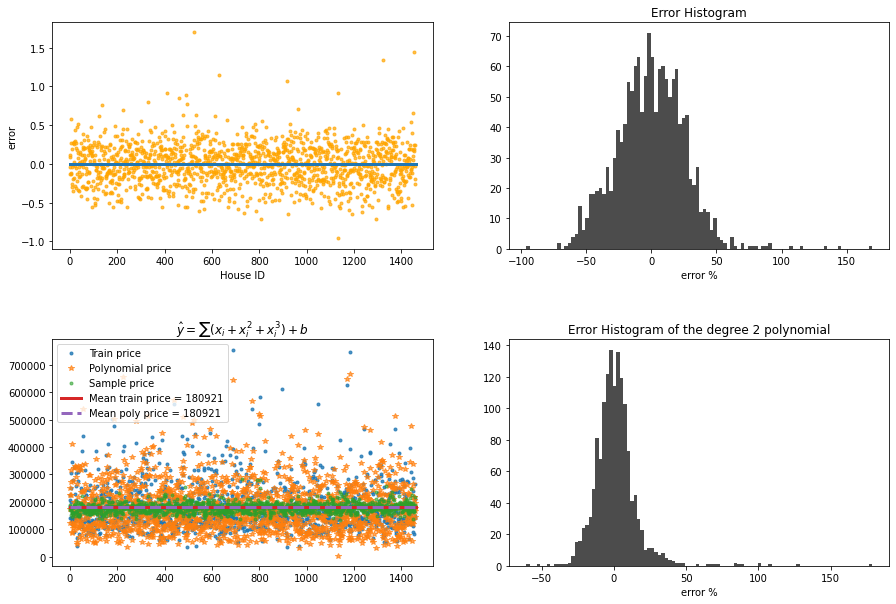

In [887]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
plt.plot(pol_err3, '.', color = 'orange', alpha = 0.7)#, legend = 'errors')
plt.plot([0,len(y)], [0, 0], lw=3)
plt.xlabel('House ID')
plt.ylabel('error')

plt.subplot(2, 2, 2)
plt.hist(pol_err3*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram')
plt.xlabel('error %')

plt.subplot(2, 2, 3)
plt.plot(y, '.', alpha = 0.8, label = 'Train price')
# plt.plot(y_test, '*', alpha = 0.7, label = 'Linear price')
plt.plot(pol_prices_3, '*', alpha = 0.7, label = 'Polynomial price')
plt.plot(ys, '.', alpha = 0.6, label = 'Sample price')
plt.plot([0,len(y)], [y.mean(), y.mean()], lw=3, label=f'Mean train price = {int(y.mean())}')
plt.plot([0,len(pol_prices_3)], [pol_prices_3.mean(), pol_prices_3.mean()], '--', lw=3, label=f'Mean poly price = {int(pol_prices_3.mean())}')
plt.title('$\hat{y} = \sum (x_i + x_i^2 + x_i^3) + b$')
plt.legend(loc=2)

plt.subplot(2, 2, 4)
plt.hist(pol_err1*100, color = 'black', bins = 100, alpha = 0.7)
plt.title('Error Histogram of the degree 2 polynomial')
plt.xlabel('error %');

# Conclusions

- Since the linear regression is performed with the train set sale prices, the mean of the prediction for the test set is very close, in the case of the polynomial approximation it is actually the same.


- A polynomial of a higher degree does not necessarily gives us a better prediction.


- Also, if we choose to model our 𝑛-parameter data with a polynomial of degree 𝑑, we will work with 𝑛𝑑 paramaters, which is not a very big leap if 𝑑 is small, but can become a problem later.


- Comparing error histograms also helps to say which model sticks better to the training data.